# USA

In [3]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 1.3 MB/s eta 0:00:08
     ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
      --------------------------------------- 0.2/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.3/9.2 MB 1.3 MB/s eta 0:00:08
     - -------------------------------------- 0.3/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/9.2 MB 1.3 MB/s eta 0:00:07
     --- ------------------------------------ 0.7/9.2 MB 1.3 MB/s eta 0

In [4]:
#Import libraries
import shap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math

from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.impute import KNNImputer

import xgboost as xgb
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

## Cas de dengue

- 2014 : https://catalog.data.gov/dataset/nndss-table-ii-cryptosporidiosis-to-dengue-hemorrhagic-fever
- 2015 : https://catalog.data.gov/dataset/nndss-table-ii-cryptosporidiosis-to-dengue-6496e
- 2016 : https://catalog.data.gov/dataset/nndss-table-ii-cryptosporidiosis-to-dengue-17768
- 2017 : https://catalog.data.gov/dataset/nndss-table-ii-cryptosporidiosis-to-dengue
- 2018 : https://catalog.data.gov/dataset/nndss-table-ii-cryptosporidiosis-to-dengue-virus-infection
- 2019 : https://catalog.data.gov/dataset/nndss-table-1j-dengue-virus-infections-dengue-to-severe-dengue-0ea84
- 2020 : https://catalog.data.gov/dataset/nndss-table-1j-dengue-virus-infections-dengue-to-severe-dengue
- 2021 : https://catalog.data.gov/dataset/nndss-table-1j-dengue-virus-infections-dengue-to-severe-dengue-ca5b5
- 2022 : https://catalog.data.gov/dataset/nndss-table-1j-dengue-virus-infections-dengue-to-severe-dengue-704a0

In [21]:
MyColumns = ['State','Year','Week','Cases_per_week','Cum_Cases','SevereCases_per_week','Cum_SevereCases']

In [22]:
#2014
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2014.csv'
dataframe_USA_2014 = pd.read_csv(Path)

dataframe_USA_2014 = dataframe_USA_2014[['Reporting Area', 'MMWRYear','MMWRWeek','Dengue Fever†, Current week', 'Dengue Fever†, Cum 2014','Dengue Hemorrhagic Fever§, Current week', 'Dengue Hemorrhagic Fever§, Cum 2014']]
dataframe_USA_2014.columns = MyColumns
dataframe_USA_2014['State'][dataframe_USA_2014['State'] == 'DIST. OF COL.'] = 'DISTRICT OF COLUMBIA'
dataframe_USA_2014 = dataframe_USA_2014.sort_values(by=['State', 'Week']).reset_index(drop=True)

X = dataframe_USA_2014.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2014['Cum_Cases'] = Y
dataframe_USA_2014 = dataframe_USA_2014.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
#2015
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2015.csv'
dataframe_USA_2015 = pd.read_csv(Path)
dataframe_USA_2015.columns
dataframe_USA_2015 = dataframe_USA_2015[['Reporting Area', 'MMWRYear','MMWRWeek','Dengue§, Current week', 'Dengue§, Cum 2015','Dengue Severe, Current week', 'Dengue Severe, Cum 2015']]
dataframe_USA_2015.columns = MyColumns
dataframe_USA_2015['State'][dataframe_USA_2015['State'] == 'DIST. OF COL.'] = 'DISTRICT OF COLUMBIA'

dataframe_USA_2015 = dataframe_USA_2015.sort_values(by=['State', 'Week']).reset_index(drop=True)


X = dataframe_USA_2015.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2015['Cum_Cases'] = Y

dataframe_USA_2015 = dataframe_USA_2015.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
# 2016
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2016.csv'
dataframe_USA_2016 = pd.read_csv(Path)
dataframe_USA_2016 = dataframe_USA_2016[['Reporting Area', 'MMWR Year','MMWR Week','Dengue§, Current week', 'Dengue§, Cum 2016','Dengue Severe, Current week', 'Dengue Severe, Cum 2016']]
dataframe_USA_2016.columns = MyColumns

dataframe_USA_2016['State'][dataframe_USA_2016['State'] == 'DIST. OF COL.'] = 'DISTRICT OF COLUMBIA'
dataframe_USA_2016 = dataframe_USA_2016.sort_values(by=['State', 'Week']).reset_index(drop=True)
X = dataframe_USA_2016.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2016['Cum_Cases'] = Y

dataframe_USA_2016 = dataframe_USA_2016.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
# 2017
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2017.csv'
dataframe_USA_2017 = pd.read_csv(Path)
dataframe_USA_2017.columns
dataframe_USA_2017 = dataframe_USA_2017[['Reporting Area', 'MMWRYear','MMWRWeek','Dengue Virus Infection, Dengue§, Current week', 'Dengue Virus Infection, Dengue§, Cum 2017','Dengue Virus Infection, Severe Dengue, Current week', 'Dengue Virus Infection, Severe Dengue, Cum 2017']]
dataframe_USA_2017.columns = MyColumns
dataframe_USA_2017['State'][dataframe_USA_2017['State'] == 'DIST. OF COL.'] = 'DISTRICT OF COLUMBIA'

dataframe_USA_2017 = dataframe_USA_2017.sort_values(by=['State', 'Week']).reset_index(drop=True)
X = dataframe_USA_2017.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2017['Cum_Cases'] = Y

dataframe_USA_2017 = dataframe_USA_2017.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
# 2018
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2018.csv'
dataframe_USA_2018 = pd.read_csv(Path)
dataframe_USA_2018.columns
dataframe_USA_2018 = dataframe_USA_2018[['Reporting Area', 'MMWRYear','MMWRWeek','Dengue Virus Infections, Dengue†, Current week', 'Dengue Virus Infections, Dengue†, Cum 2018','Dengue Virus Infections, Severe Dengue, Current week', 'Dengue Virus Infections, Severe Dengue, Cum 2018']]
dataframe_USA_2018.columns = MyColumns
dataframe_USA_2018['State'][dataframe_USA_2018['State'] == 'DIST. OF COL.'] = 'DISTRICT OF COLUMBIA'

dataframe_USA_2018 = dataframe_USA_2018.sort_values(by=['State', 'Week']).reset_index(drop=True)
X = dataframe_USA_2018.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2018['Cum_Cases'] = Y

dataframe_USA_2018 = dataframe_USA_2018.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
# 2019
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2019.csv'
dataframe_USA_2019 = pd.read_csv(Path)
dataframe_USA_2019.columns
dataframe_USA_2019 = dataframe_USA_2019[['Reporting Area', 'MMWR Year','MMWR Week','Dengue virus infections§ , Dengue, Current week', 'Dengue virus infections§ , Dengue, Cum 2019†','Dengue virus infections§ , Severe dengue, Current week', 'Dengue virus infections§ , Severe dengue,  Cum 2019†']]
dataframe_USA_2019.columns = MyColumns

dataframe_USA_2019 = dataframe_USA_2019.sort_values(by=['State', 'Week']).reset_index(drop=True)
X = dataframe_USA_2019.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2019['Cum_Cases'] = Y

dataframe_USA_2019 = dataframe_USA_2019.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)


In [28]:
# 2020
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2020.csv'
dataframe_USA_2020 = pd.read_csv(Path)
dataframe_USA_2020.columns
dataframe_USA_2020 = dataframe_USA_2020[['Reporting Area', 'MMWR Year','MMWR Week','Dengue virus infections, Dengue, Current week', 'Dengue virus infections, Dengue, Cum 2020†','Dengue virus infections, Severe dengue, Current week', 'Dengue virus infections, Severe dengue,  Cum 2020†']]
dataframe_USA_2020.columns = MyColumns

dataframe_USA_2020 = dataframe_USA_2020.sort_values(by=['State', 'Week']).reset_index(drop=True)
X = dataframe_USA_2020.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2020['Cum_Cases'] = Y

dataframe_USA_2020 = dataframe_USA_2020.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)

In [29]:
# 2021
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\2021.csv'
dataframe_USA_2021 = pd.read_csv(Path)
dataframe_USA_2021.columns
dataframe_USA_2021 = dataframe_USA_2021[['Reporting Area', 'MMWR Year','MMWR Week','Dengue virus infections, Dengue, Current week', 'Dengue virus infections, Dengue, Cum 2021†','Dengue virus infections, Severe dengue, Current week', 'Dengue virus infections, Severe dengue,  Cum 2021†']]
dataframe_USA_2021.columns = MyColumns
dataframe_USA_2021 = dataframe_USA_2021.sort_values(by=['State', 'Week']).reset_index(drop=True)

X = dataframe_USA_2021.groupby('State')
Y = X['Cum_Cases'].transform(lambda x: x.ffill())
dataframe_USA_2021['Cum_Cases'] = Y

dataframe_USA_2021 = dataframe_USA_2021.drop(['Cum_SevereCases','SevereCases_per_week'], axis = 1)

In [30]:
dataframe_USA = pd.concat([dataframe_USA_2014,dataframe_USA_2015,dataframe_USA_2016,dataframe_USA_2017,dataframe_USA_2018,dataframe_USA_2019,dataframe_USA_2020,dataframe_USA_2021], axis = 0)

In [31]:
#keep states informations only
us_states = [
    "ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA",
    "COLORADO", "CONNECTICUT", "DELAWARE", "FLORIDA", "GEORGIA", "HAWAII",
    "IDAHO", "ILLINOIS", "INDIANA", "IOWA",
    "KANSAS", "KENTUCKY", "LOUISIANA", "MAINE", "MARYLAND",
    "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", "MISSOURI",
    "MONTANA", "NEBRASKA", "NEVADA", "NEW HAMPSHIRE", "NEW JERSEY",
    "NEW MEXICO", "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO",
    "OKLAHOMA", "OREGON", "PENNSYLVANIA", "RHODE ISLAND", "SOUTH CAROLINA", 
    "SOUTH DAKOTA", "TENNESSEE", "TEXAS", "UTAH", "VERMONT", "VIRGINIA",
    "WASHINGTON", "WEST VIRGINIA", "WISCONSIN", "WYOMING","DISTRICT OF COLUMBIA"
    ]

USA_dengue = dataframe_USA[dataframe_USA['State'].isin(us_states)]

In [32]:
## compute the cases_per_week from cum cases

# Sort the DataFrame by 'week'
USA_dengue = USA_dengue.sort_values(by=['Week'])

# Group by 'state' and 'year' and calculate cases per week
USA_dengue['Cum_Cases'] = USA_dengue['Cum_Cases'].fillna(0)
USA_dengue['Cases_per_week'] = USA_dengue.groupby(['State', 'Year'])['Cum_Cases'].diff()#.fillna(USA_dengue['Cum_Cases'].shift())
USA_dengue = USA_dengue.sort_values(by=['State','Year', 'Week']).reset_index(drop=True)
USA_dengue['Cases_per_week'] = USA_dengue['Cases_per_week'].fillna(0)



In [33]:
USA_dengue.head()

,State,Year,Week,Cases_per_week,Cum_Cases
0,ALABAMA,2014,1,0.0,0.0
1,ALABAMA,2014,2,0.0,0.0
2,ALABAMA,2014,3,0.0,0.0
3,ALABAMA,2014,4,0.0,0.0
4,ALABAMA,2014,5,0.0,0.0


In [34]:
ERR = USA_dengue.loc[USA_dengue['Cases_per_week'] < 0,["State","Year"]]
ERR

,State,Year


Les semaines sont définies du dimanche au samedi selon le MMWR (Morbidity and Mortality Weekly Report). Week 1 = première semaine de janvier. Un semaine donnée est associée au mois x si 4 de ses jours ou plus sont dans le mois x. Voir tableaux MMWR : https://ndc.services.cdc.gov/wp-content/uploads/MMWR-Week-Log-2022-2023.pdf

In [35]:
#add month information according to 'MMWR_weeks.xlsx' file

week_to_month_mapping = {
    2014: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 5, 20: 5, 21: 5, 22: 5, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 10, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12, 53: 12},
    2015: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3, 13: 4, 14: 4, 15: 4, 16: 4, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 6, 23: 6, 24: 6, 25: 6, 26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 9, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 11, 45: 11, 46: 11, 47: 11, 48: 12, 49: 12, 50: 12, 51: 12, 52: 12},
    2016: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 5, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 11, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12},
    2017: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 11, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12},
    2018: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 10, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12},
    2019: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 10, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12},
    2020: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 5, 20: 5, 21: 5, 22: 5, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 8, 33: 8, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 9, 41: 10, 42: 10, 43: 10, 44: 10, 45: 11, 46: 11, 47: 11, 48: 11, 49: 12, 50: 12, 51: 12, 52: 12, 53: 12},
    2021: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 5, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 9, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 11, 45: 11, 46: 11, 47: 11, 48: 12, 49: 12, 50: 12, 51: 12, 52: 12}
}


# Add a 'month' column based on the mapping
USA_dengue['Month'] = USA_dengue.apply(lambda row: week_to_month_mapping[row['Year']][row['Week']], axis=1)

In [36]:
#sum cases per week to get cases per month

Cases_per_month = USA_dengue.groupby(['State','Year','Month'])['Cases_per_week'].sum()
#type(Cases_per_month)
Cases_per_month = Cases_per_month.to_frame()
#Cases_per_month.sort_values(by=['Month'])
Cases_per_month = Cases_per_month['Cases_per_week']
pd.set_option("display.max_rows", None, "display.max_columns", None)
#Cases_per_month


In [37]:
State = np.sort(np.repeat(us_states,12*8))
#print(len(State))
Year = np.array(range(2014,2022))
Year = np.repeat(Year,12)
Year = np.array(list(Year) * len(us_states))
#print(len(Year))
Month = np.array(list(range(1,13)) * len(us_states)*8)
#print(len(Month))



data = {'State': State, 'Year': Year, 'Month': Month, 'Cases_per_month' : Cases_per_month}
USA_dengue_month = pd.DataFrame(data).reset_index(drop = True)

In [38]:
np.isnan(USA_dengue_month['Cases_per_month']).any()

False

## Données météo (.nc files)

### Définir les contours des états

Source : https://eric.clst.org/tech/usgeojson/

In [39]:
# Load the GeoJSON data
states = gpd.read_file(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\state_boundaries_complex.json')

In [40]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


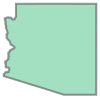

In [41]:
states['geometry'].iloc[2]

Dans ce fichier, on a le format [longitude,latitude]

In [42]:
states['NAME'] = states['NAME'].str.upper()
states = states[states['NAME'].isin(us_states)].reset_index(drop = True)

### Precipitation, temperature, cloud cover, humidity and wind data

In [43]:
#precipitations en moyenne par mois entre 1950 et 2100 
path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\Climatic\TempANDPrec'
file_path = path+'\precipitation_monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
prec_dataset = nc.Dataset(file_path)
#dataset #to see details about the file

Source : https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-biodiversity-cmip5-global?tab=overview

In [44]:
prec_dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Fri Dec 18 02:22:21 2020: ncpdq -a time,latitude,longitude /tmp/tmpmrvkbalq.nc_temp /tmp/tmpmrvkbalq.nc
    Conventions: CF-1.7
    Institution: (C) VITO, Belgium
    References: See documentation for full references at https://climate.copernicus.eu/
    Contact: Please contact Copernicus User Support on the Copernicus Climate Change Service website (https://climate.copernicus.eu/)
    Version: v1
    Title: C3S D427 SIS Biodiversity / Bio-climate indicators / precipitation_monthly-mean / CMIP5 / rcp85 ACCESS1-0 r1i1p1 / bias-adjusted with ERA5 / 20-year month_000.5degree_global
    Source: CMIP5 dataset (rcp85 ACCESS1-0 r1i1p1) bias-adjusted to ERA5 by VITO
    Licence: ECMWF Copernicus licence 1.0
    dimensions(sizes): latitude(348), longitude(720), time(1812)
    variables(dimensions): float64 latitude(latitude), float64 longitude(longitude), int64 time(time), float32 precipitation_mo

In [45]:
#températures en moyenne par mois entre 1950 et 2100 (mean, max et min)
path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\Climatic\TempANDPrec'
file_path = path+r'\temperature_monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
tempMean_dataset = nc.Dataset(file_path)


file_path = path+r'\temperature_daily-minimum-monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
tempMin_dataset = nc.Dataset(file_path)

file_path = path+r'\temperature_daily-maximum-monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
tempMax_dataset = nc.Dataset(file_path)


path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\Climatic\cloud_coverANDwind_speed'
file_path = path+r'\wind-speed_monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
wind_dataset = nc.Dataset(file_path)

file_path = path+r'\cloud-cover_monthly-mean_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc'
cloud_dataset = nc.Dataset(file_path)

In [46]:
prec_data = prec_dataset.variables['precipitation_monthly-mean'][:]
latitudes = prec_dataset.variables['latitude'][:].compressed()
longitudes = prec_dataset.variables['longitude'][:].compressed()

tempMean_data = tempMean_dataset.variables['temperature_monthly-mean'][:]
tempMin_data = tempMin_dataset.variables['temperature_daily-minimum-monthly-mean'][:]
tempMax_data = tempMax_dataset.variables['temperature_daily-maximum-monthly-mean'][:]
windSpeed_data = wind_dataset.variables['wind-speed'][:]
cloudCover_data = cloud_dataset.variables['cloud-cover'][:]

In [47]:
## extract the months of interest

#import numpy as np
year_vector = np.array(range(1950,2101)) #in years
nb_years = len(year_vector)
year_vector = np.repeat(year_vector, repeats = 12, axis=None)

month_vector = np.array(range(1,13))
month_vector = np.array(list(month_vector) * nb_years)

# jan2014_idx = np.where((year_vector == 2014) & (month_vector == 1))
# jan2014_idx = jan2014_idx[0][0]
jan2013_idx = np.where((year_vector == 2013) & (month_vector == 1))
jan2013_idx = jan2013_idx[0][0]
dec2050_idx = np.where((year_vector == 2050) & (month_vector == 12))
dec2050_idx = dec2050_idx[0][0]

prec_data = prec_data[jan2013_idx:dec2050_idx+1,:,:]
tempMean_data = tempMean_data[jan2013_idx:dec2050_idx+1,:,:]
tempMin_data = tempMin_data[jan2013_idx:dec2050_idx+1,:,:]
tempMax_data = tempMax_data[jan2013_idx:dec2050_idx+1,:,:]
windSpeed_data = windSpeed_data[jan2013_idx:dec2050_idx+1,:,:]
cloudCover_data = cloudCover_data[jan2013_idx:dec2050_idx+1,:,:]


In [48]:
#Create meteo dataframe
LAT = np.array(list(latitudes)*len(longitudes))
LNG = np.repeat(longitudes,len(latitudes))

PREC = []
TEMP_mean = []
TEMP_min = []
TEMP_max = []
CloudCover = []
WindSpeed = []
for lng in range(len(longitudes)):
    for lat in range(len(latitudes)):
        #PREC[lng*len(LAT) + lat] = data[:,lat,lng].compressed()
        PREC.append(prec_data[:,lat,lng].compressed())
        TEMP_mean.append(tempMean_data[:,lat,lng].compressed())
        TEMP_min.append(tempMin_data[:,lat,lng].compressed())
        TEMP_max.append(tempMax_data[:,lat,lng].compressed())
        CloudCover.append(cloudCover_data[:,lat,lng].compressed())
        WindSpeed.append(windSpeed_data[:,lat,lng].compressed())



In [49]:
meteo_df = pd.DataFrame({
    'latitude': LAT,
    'longitude': LNG,
    'precipitation': PREC,
    'temp_min' : TEMP_min,
    'temp_mean' : TEMP_mean,
    'temp_max' : TEMP_max,
    'cloud_cover' : CloudCover,
    'wind_speed' : WindSpeed
})

In [50]:
meteo_df.head()

,latitude,longitude,precipitation,temp_min,temp_mean,temp_max,cloud_cover,wind_speed
0,-89.75,-179.75,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,-89.25,-179.75,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.8983173, 4.775206, 4.385342, 5.537686, 5.46..."
2,-88.75,-179.75,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.199864, 5.2049036, 5.133479, 5.6148763, 5.8..."
3,-88.25,-179.75,"[9.367511e-10, 1.993497e-09, 1.9279491e-09, 3....","[244.39316, 234.04416, 226.04156, 223.65959, 2...","[245.50522, 235.51692, 228.03252, 226.46315, 2...","[246.87149, 237.28104, 229.8062, 229.16064, 22...","[0.7797694, 0.9409491, 0.9508276, 1.0, 0.80480...","[6.356455, 6.64489, 7.2530146, 7.147127, 7.588..."
4,-87.75,-179.75,"[4.2810389e-10, 1.8762312e-09, 1.7783212e-09, ...","[245.54652, 235.89899, 229.13829, 226.52986, 2...","[246.5245, 237.47633, 231.21954, 229.51324, 22...","[247.9564, 239.35774, 233.11017, 232.21071, 22...","[0.5598522, 0.8496438, 0.91959286, 1.0, 0.8611...","[6.69618, 7.14504, 8.255163, 8.052191, 8.90990..."


In [51]:
# Transformez les coordonnées en objets Shapely Points
from shapely.geometry import Point
geometry = [Point(lon, lat) for lon, lat in zip(meteo_df['longitude'], meteo_df['latitude'])]

# Créez le GeoDataFrame avec les données et la géométrie
points_gdf = gpd.GeoDataFrame(meteo_df, geometry=geometry)


In [52]:
# Create a spatial index for the state geometries
state_sindex = states.sindex


# Initialize an empty list to store the state names
state_names = []

# Iterate through each point in the position GeoDataFrame
for idx, point in points_gdf.iterrows():
    # Find the indices of the states that intersect with the point
    possible_matches_index = list(state_sindex.intersection(point['geometry'].bounds))
    
    # Check if the point is within any of the potential matching states
    for state_index in possible_matches_index:
        if point['geometry'].within(states.iloc[state_index]['geometry']):
            state_names.append(states.iloc[state_index]['NAME'])
            break
    else:
        state_names.append('NA')

# Add the state names to the 'position' DataFrame
meteo_df['State'] = state_names

In [53]:
#only keep the data that come from the states i.e. remove lines with NA
meteo_df = meteo_df[meteo_df['State'].isin(us_states)].reset_index(drop = True)

In [54]:
meteo_df.head()

,latitude,longitude,precipitation,temp_min,temp_mean,temp_max,cloud_cover,wind_speed,State
0,51.75,-177.25,"[3.3211194e-08, 4.3279204e-08, 4.9052314e-08, ...","[274.18973, 275.26727, 274.94278, 275.55984, 2...","[274.96744, 275.71548, 275.67694, 276.34464, 2...","[275.83093, 276.23578, 276.4629, 277.36725, 27...","[0.7719699, 0.79940224, 0.80307513, 0.781893, ...","[10.328191, 8.368218, 11.194351, 10.17819, 7.0...",ALASKA
1,51.75,-176.75,"[2.7502942e-08, 3.643702e-08, 4.629087e-08, 5....","[272.13004, 273.5784, 273.54828, 274.6157, 277...","[273.47562, 274.48892, 274.7069, 275.8896, 278...","[274.91092, 275.5619, 276.08246, 277.62695, 27...","[0.75789857, 0.78001076, 0.80184126, 0.7957841...","[8.191928, 6.1225, 9.020222, 8.227348, 5.58851...",ALASKA
2,52.25,-174.25,"[3.756498e-08, 3.021241e-08, 4.861713e-08, 5.1...","[273.8605, 274.9676, 274.55994, 274.91547, 277...","[274.60837, 275.5639, 275.1665, 275.837, 277.6...","[275.3281, 276.07315, 276.01675, 276.75674, 27...","[0.7640284, 0.72462773, 0.8039627, 0.79531467,...","[10.786419, 8.008757, 11.189797, 10.422767, 7....",ALASKA
3,63.25,-170.25,"[1.427242e-08, 2.1187489e-08, 1.513667e-08, 1....","[256.15228, 262.5021, 258.4439, 264.2758, 273....","[258.9107, 264.74277, 260.94092, 266.3971, 274...","[261.77643, 267.40286, 264.27914, 268.99164, 2...","[0.875943, 0.90356755, 0.8813978, 0.9085062, 0...","[8.460751, 7.3939285, 7.634448, 6.7406635, 5.4...",ALASKA
4,63.25,-169.75,"[1.3529604e-08, 2.0489905e-08, 1.4776299e-08, ...","[255.16214, 262.33255, 258.08847, 264.09967, 2...","[258.4387, 264.7545, 260.96423, 266.40244, 274...","[261.53732, 267.66467, 264.59775, 269.14847, 2...","[0.85100275, 0.8867495, 0.87749916, 0.9035925,...","[8.321936, 7.3068027, 7.680989, 6.9031863, 5.2...",ALASKA


La précipitation est en m/s et représente la moyenne sur un mois de la précipitation moyenne par seconde sur chaque journée. Il faut donc utiliser un facteur multiplicatif pour avoir la précipitation accumulée sur tout le mois en mm :

In [55]:
#convert the precipitation
meteo_df.precipitation = meteo_df.precipitation*3600*24*1000*30.4

Concernant la température, elle est en Kelvin et manque donc de représentativité. On choisit de la convertir en degrés celcius :

In [56]:
meteo_df.temp_min = meteo_df.temp_min-272.15
meteo_df.temp_mean = meteo_df.temp_mean-272.15
meteo_df.temp_max = meteo_df.temp_max-272.15

Pour le 'cloud_cover', les données sont sans dimension car elles correpondant à la fraction de l'unité spatiale où le ciel est couvert par des nuages. Tous les nuages sont considérés, quelle que soit leur altitude. 

La vitesse du vent est données en mètres par seconde, on va le convertir en km/h

In [57]:
meteo_df.wind_speed = meteo_df.wind_speed*3.6 #en km/h

In [58]:
#group by state and average over all locations within a given state for each time point
agg_functions = {'precipitation': 'mean', 'temp_min': 'mean', 'temp_mean': 'mean', 'temp_max': 'mean', 'cloud_cover' : 'mean', 'wind_speed' : 'mean'}
# meteo_df = meteo_df.groupby(['State'])[['precipitation','temperature']].mean()
meteo_df_organized = meteo_df.groupby(['State']).agg(agg_functions).reset_index()
meteo_df_organized = pd.DataFrame(meteo_df_organized)

In [59]:
meteo_df_organized.head()

,State,precipitation,temp_min,temp_mean,temp_max,cloud_cover,wind_speed
0,ALABAMA,"[90.60465, 91.505005, 94.44257, 85.28189, 81.0...","[6.5814395, 2.876882, 9.891783, 14.401595, 19....","[10.182307, 7.4011655, 15.74992, 19.688072, 24...","[14.792825, 13.083414, 22.249472, 25.721102, 3...","[0.6419643, 0.49718332, 0.39945796, 0.5098166,...","[10.629446, 11.330988, 10.591437, 11.03576, 8...."
1,ALASKA,"[51.232643, 64.48212, 56.08292, 60.04832, 49.3...","[-19.57172, -12.266208, -12.446827, -7.801216,...","[-16.92752, -9.668384, -9.336042, -4.4215546, ...","[-14.010742, -6.200174, -4.7421637, -0.0596544...","[0.6766707, 0.68645364, 0.6677153, 0.7009948, ...","[11.833827, 13.199695, 10.9661045, 11.513878, ..."
2,ARIZONA,"[12.95143, 9.131232, 13.063197, 10.907063, 4.1...","[1.8295828, 3.6875982, 7.237211, 8.01418, 13.6...","[8.036825, 11.184188, 15.273309, 16.101395, 22...","[15.844463, 19.640343, 23.782598, 24.026737, 3...","[0.31213346, 0.3625963, 0.32528132, 0.3090443,...","[8.734278, 10.266726, 11.487329, 12.064308, 12..."
3,ARKANSAS,"[154.74693, 45.6859, 78.426506, 167.41489, 127...","[5.106632, 1.2207648, 10.191919, 14.924163, 17...","[8.643708, 4.994125, 15.2939205, 19.201525, 22...","[13.089362, 10.563036, 21.706343, 24.690376, 2...","[0.6761099, 0.5639096, 0.44161054, 0.6434444, ...","[10.511201, 10.661796, 11.423535, 11.991143, 9..."
4,CALIFORNIA,"[35.71129, 52.005676, 56.759045, 56.29506, 26....","[4.990698, 6.029195, 7.4589877, 8.142718, 11.6...","[9.489965, 11.68294, 13.238074, 13.503625, 18....","[15.492888, 18.603952, 20.068792, 20.128332, 2...","[0.5283568, 0.4895053, 0.47959253, 0.50953895,...","[6.8917966, 7.406087, 8.3442, 9.003985, 9.2934..."


In [60]:
#create a new data frame that stores each data value separately

# Create an empty DataFrame to store the transformed data
transformed_meteo = []

# Iterate through each row in the original DataFrame
for index, row in meteo_df_organized.iterrows():
    state_name = row['State']
    precipitation = row['precipitation']
    temp_min = row['temp_min']
    temp_mean = row['temp_mean']
    temp_max = row['temp_max']
    cloud_cover = row['cloud_cover']
    wind_speed = row['wind_speed']
    
    # Calculate the year and month based on the index
    # start_year = 2014
    start_year = 2013
    for months_offset, value in enumerate(precipitation):
        year = start_year + months_offset // 12
        month = (months_offset % 12) + 1
        transformed_meteo.append([state_name, year, month, value, temp_min[months_offset], temp_mean[months_offset], temp_max[months_offset], cloud_cover[months_offset], wind_speed[months_offset]])

# Create the transformed DataFrame
transformed_meteo = pd.DataFrame(transformed_meteo, columns=['State', 'Year', 'Month', 'Precipitation','Temp_min','Temp_mean', 'Temp_max', 'Cloud_cover', 'Wind_speed'])


In [61]:
transformed_meteo.head()

,State,Year,Month,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed
0,ALABAMA,2013,1,90.604652,6.581439,10.182307,14.792825,0.641964,10.629446
1,ALABAMA,2013,2,91.505005,2.876882,7.401165,13.083414,0.497183,11.330988
2,ALABAMA,2013,3,94.442574,9.891783,15.749920,22.249472,0.399458,10.591437
3,ALABAMA,2013,4,85.281891,14.401595,19.688072,25.721102,0.509817,11.035760
4,ALABAMA,2013,5,81.026649,19.275215,24.506493,30.292990,0.547568,8.535325


In [62]:
#merge precipitation data (prec_df) with dengue data (USA_dengue_month)
merged_df = pd.merge(transformed_meteo, USA_dengue_month, on=['State', 'Year', 'Month'], how = 'left')

In [63]:
np.isnan(merged_df['Cases_per_month']).any()

True

Il y a des nan qui apparaissent car on fait aller les données météo jusqu'en 2050

In [64]:
merged_df.head()

,State,Year,Month,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month
0,ALABAMA,2013,1,90.604652,6.581439,10.182307,14.792825,0.641964,10.629446,NaN
1,ALABAMA,2013,2,91.505005,2.876882,7.401165,13.083414,0.497183,11.330988,NaN
2,ALABAMA,2013,3,94.442574,9.891783,15.749920,22.249472,0.399458,10.591437,NaN
3,ALABAMA,2013,4,85.281891,14.401595,19.688072,25.721102,0.509817,11.035760,NaN
4,ALABAMA,2013,5,81.026649,19.275215,24.506493,30.292990,0.547568,8.535325,NaN


### Humidity data

CMIP5 monthly data on single levels
https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip5-monthly-single-levels?tab=form

In [65]:
path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\Climatic\rel_Humidity'
file_path = path+r'\hurs_Amon_bcc-csm1-1-m_rcp85_r1i1p1_200601-209912.nc'
humidity_dataset = nc.Dataset(file_path)

In [66]:
humidity_data = humidity_dataset.variables['hurs'][:]
hum_lat = humidity_dataset.variables['lat'][:].compressed()
hum_lon = humidity_dataset.variables['lon'][:].compressed()

In [67]:
#convertir les longitudes pour avoir des valeurs de -180 à + 180 au lieu de 0 à 360
temp = hum_lon[hum_lon > 180]
temp = temp - 360
hum_lon[hum_lon > 180] = temp

In [68]:
## extract the months of interest for humidity data

#import numpy as np
year_vector = np.array(range(2006,2100)) #in years
nb_years = len(year_vector)
year_vector = np.repeat(year_vector, repeats = 12, axis=None)

month_vector = np.array(range(1,13))
month_vector = np.array(list(month_vector) * nb_years)

# jan2014_idx = np.where((year_vector == 2014) & (month_vector == 1))
# jan2014_idx = jan2014_idx[0][0]
jan2013_idx = np.where((year_vector == 2013) & (month_vector == 1))
jan2013_idx = jan2013_idx[0][0]
dec2050_idx = np.where((year_vector == 2050) & (month_vector == 12))
dec2050_idx = dec2050_idx[0][0]

humidity_data = humidity_data[jan2013_idx:dec2050_idx+1,:,:]

In [69]:
#Create humidity dataframe
LAT = np.array(list(hum_lat)*len(hum_lon))
LNG = np.repeat(hum_lon,len(hum_lat))

Humidity = []
for lng in range(len(hum_lon)):
    for lat in range(len(hum_lat)):
        #PREC[lng*len(LAT) + lat] = data[:,lat,lng].compressed()
        Humidity.append(humidity_data[:,lat,lng].compressed())

In [70]:
humidity_df = pd.DataFrame({
    'latitude': LAT,
    'longitude': LNG,
    'humidity' : Humidity
})

In [71]:
# Transformez les coordonnées en objets Shapely Points
from shapely.geometry import Point
geometry = [Point(lon, lat) for lon, lat in zip(humidity_df['longitude'], humidity_df['latitude'])]

# Créez le GeoDataFrame avec les données et la géométrie
points_gdf = gpd.GeoDataFrame(humidity_df, geometry=geometry)


In [72]:
# Create a spatial index for the state geometries
state_sindex = states.sindex


# Initialize an empty list to store the state names
state_names = []

# Iterate through each point in the position GeoDataFrame
for idx, point in points_gdf.iterrows():
    # Find the indices of the states that intersect with the point
    possible_matches_index = list(state_sindex.intersection(point['geometry'].bounds))
    
    # Check if the point is within any of the potential matching states
    for state_index in possible_matches_index:
        if point['geometry'].within(states.iloc[state_index]['geometry']):
            state_names.append(states.iloc[state_index]['NAME'])
            break
    else:
        state_names.append('NA')

# Add the state names to the 'position' DataFrame
humidity_df['State'] = state_names

In [73]:
#only keep the data that come from the states i.e. remove lines with NA
humidity_df = humidity_df[humidity_df['State'].isin(us_states)].reset_index(drop = True)

In [74]:
#group by state and average over all locations within a given state for each time point
agg_functions = {'humidity': 'mean'}
# meteo_df = meteo_df.groupby(['State'])[['precipitation','temperature']].mean()
humidity_df_organized = humidity_df.groupby(['State']).agg(agg_functions).reset_index()
humidity_df_organized = pd.DataFrame(humidity_df_organized)

Certains états sont trop petits pour que la résolution spatiale du jeu de données puisse leur attribuer une valuer. Ci dessous, les états en question : 

In [75]:
for state in us_states:
    if state not in humidity_df.State.unique():
        print(state)

CONNECTICUT
MARYLAND
RHODE ISLAND
DISTRICT OF COLUMBIA


In [76]:
#create a new data frame that stores each data value separately

# Create an empty DataFrame to store the transformed data
transformed_humidity = []

# Iterate through each row in the original DataFrame
for index, row in humidity_df_organized.iterrows():
    state_name = row['State']
    humidity = row['humidity']
    
    # Calculate the year and month based on the index
    # start_year = 2014
    start_year = 2013
    for months_offset, value in enumerate(humidity):
        year = start_year + months_offset // 12
        month = (months_offset % 12) + 1
        transformed_humidity.append([state_name, year, month, humidity[months_offset]])

# Create the transformed DataFrame
transformed_humidity = pd.DataFrame(transformed_humidity, columns=['State', 'Year', 'Month', 'Humidity'])


In [77]:
#merge humidity data with merged_df
merged_df = pd.merge(transformed_humidity, merged_df, on=['State', 'Year', 'Month'],how = 'right')

In [59]:
# # Convert 'Year' and 'Month' columns to categorical
# merged_df['Year'] = merged_df['Year'].astype('category')
# merged_df['Month'] = merged_df['Month'].astype('category')

In [78]:
merged_df.head()

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month
0,ALABAMA,2013,1,89.606239,90.604652,6.581439,10.182307,14.792825,0.641964,10.629446,NaN
1,ALABAMA,2013,2,85.086189,91.505005,2.876882,7.401165,13.083414,0.497183,11.330988,NaN
2,ALABAMA,2013,3,79.740677,94.442574,9.891783,15.749920,22.249472,0.399458,10.591437,NaN
3,ALABAMA,2013,4,61.924522,85.281891,14.401595,19.688072,25.721102,0.509817,11.035760,NaN
4,ALABAMA,2013,5,51.770153,81.026649,19.275215,24.506493,30.292990,0.547568,8.535325,NaN


## Demographic data

In [79]:
Path = r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\Demography\Yearly_demography_2010-2022.csv'
Dem = pd.read_csv(Path,sep = ';')
Dem['State'] = Dem['State'].str.upper()

In [80]:
Dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   2010    51 non-null     object
 2   2011    51 non-null     object
 3   2012    51 non-null     object
 4   2013    51 non-null     object
 5   2014    51 non-null     object
 6   2015    51 non-null     object
 7   2016    51 non-null     object
 8   2017    51 non-null     object
 9   2018    51 non-null     object
 10  2019    51 non-null     object
 11  2020    51 non-null     object
 12  2021    51 non-null     object
 13  2022    51 non-null     object
dtypes: object(14)
memory usage: 5.7+ KB


Demographic data are strings with spaces, I have to remove the spaces in order to transform them into integer values

In [81]:
def remove_whitespace(test):
    return test.replace(" ","")

Dem.iloc[:,1:len(Dem.columns)] = Dem.iloc[:,1:len(Dem.columns)].applymap(remove_whitespace) #applymap applies the function to each element of the dataframe 'Dem.iloc[:,1:len(Dem.columns)]'
Dem.iloc[:,1:len(Dem.columns)] = Dem.iloc[:,1:len(Dem.columns)].astype(int)

for year in range(2010, 2023):
    Dem[str(year)] = pd.to_numeric(Dem[str(year)])

Create dem_growth dictionary based on data given here : https://www.cbo.gov/publication/58612#:~:text=In%20CBO's%20projections%2C%20the%20U.S.,population%20growth%20beginning%20in%202042.

In [82]:
growth_values = np.array(list([0.5 , 0.5, 0.4]) + list(np.repeat(0.5,6)) + list(np.repeat(0.4,7)) + list(np.repeat(0.3,6)) + list(np.repeat(0.2,6)))/100 #values given by the source are in percent
# print(growth.shape)
start_year = 2023
end_year = 2050
dem_growth = {year: value for year, value in zip(range(start_year, end_year + 1), growth_values)}

for year in range(2023,2051):
    Dem[str(year)] = Dem[str(year-1)]*(1+dem_growth[year])

In [83]:
Dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2010    51 non-null     int64  
 2   2011    51 non-null     int64  
 3   2012    51 non-null     int64  
 4   2013    51 non-null     int64  
 5   2014    51 non-null     int64  
 6   2015    51 non-null     int64  
 7   2016    51 non-null     int64  
 8   2017    51 non-null     int64  
 9   2018    51 non-null     int64  
 10  2019    51 non-null     int64  
 11  2020    51 non-null     int64  
 12  2021    51 non-null     int64  
 13  2022    51 non-null     int64  
 14  2023    51 non-null     float64
 15  2024    51 non-null     float64
 16  2025    51 non-null     float64
 17  2026    51 non-null     float64
 18  2027    51 non-null     float64
 19  2028    51 non-null     float64
 20  2029    51 non-null     float64
 21  2030    51 non-null     float64
 22  2031

In [84]:
# merged_df2 = merged_df.copy()
all_years = merged_df['Year'].unique()

merged_dem = pd.DataFrame()
for year in all_years:
    demographic = Dem[['State', str(year)]]
    merged_year = merged_df[merged_df['Year'] == year]
    merged_year = pd.merge(merged_year, demographic, on='State')
    merged_year.rename(columns={merged_year.columns[-1]: 'Demographic'}, inplace=True)
    merged_dem = pd.concat([merged_dem, merged_year],axis = 0)



In [85]:
merged_dem.loc[merged_dem.Month != 12,'Demographic'] = None

# Dem_2013 = Dem[['State','2013']]
# #convert into dictionary
# Dem_2013_dict = Dem_2013.set_index('State')['2013'].to_dict()
Dem_2012 = Dem[['State','2012']]
#convert into dictionary
Dem_2012_dict = Dem_2012.set_index('State')['2012'].to_dict()

# Update 'Demographic' column for rows where Year is 2014 and Month is 1
mask = (merged_dem['Year'] == 2013) & (merged_dem['Month'] == 1)
merged_dem.loc[mask, 'Demographic'] = merged_dem.loc[mask, 'State'].map(Dem_2012_dict)


Interpolation des données démographiques données par an

In [86]:
merged_dem = merged_dem.reset_index(drop=True)
merged_dem['Demographic'] = merged_dem.groupby('State')['Demographic'].transform(lambda group: group.interpolate(method='linear'))

In [87]:
merged_dem.head()

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month,Demographic
0,ALABAMA,2013,1,89.606239,90.604652,6.581439,10.182307,14.792825,0.641964,10.629446,NaN,4.815588e+06
1,ALABAMA,2013,2,85.086189,91.505005,2.876882,7.401165,13.083414,0.497183,11.330988,NaN,4.816906e+06
2,ALABAMA,2013,3,79.740677,94.442574,9.891783,15.749920,22.249472,0.399458,10.591437,NaN,4.818223e+06
3,ALABAMA,2013,4,61.924522,85.281891,14.401595,19.688072,25.721102,0.509817,11.035760,NaN,4.819541e+06
4,ALABAMA,2013,5,51.770153,81.026649,19.275215,24.506493,30.292990,0.547568,8.535325,NaN,4.820858e+06


In [88]:
np.isnan(merged_dem['Cases_per_month']).any()

True

#### Convertir le nombre d'habitants en densité de population :

In [89]:
#dict with areas (in km2)
state_area = {
    "ALABAMA":135767,
    "ALASKA": 1723337, 
    "ARIZONA": 295234, 
    "ARKANSAS":137732, 
    "CALIFORNIA": 423967,
    "COLORADO": 269601,
    "CONNECTICUT":14357, 
    "DELAWARE":6446, 
    "FLORIDA":170312,
    "GEORGIA":153910,
    "HAWAII":28313,
    "IDAHO": 216443, 
    "ILLINOIS":149995, 
    "INDIANA":94326, 
    "IOWA":145746,
    "KANSAS": 213100, 
    "KENTUCKY":104656, 
    "LOUISIANA":135659, 
    "MAINE":91633, 
    "MARYLAND":32131,
    "MASSACHUSETTS":27336, 
    "MICHIGAN": 250487, 
    "MINNESOTA": 225163, 
    "MISSISSIPPI":125438, 
    "MISSOURI":180540,
    "MONTANA": 380831, 
    "NEBRASKA": 200330, 
    "NEVADA": 286380, 
    "NEW HAMPSHIRE":24214, 
    "NEW JERSEY":22591,
    "NEW MEXICO": 314917, 
    "NEW YORK":141297, 
    "NORTH CAROLINA":139391, 
    "NORTH DAKOTA": 183108, 
    "OHIO":116098,
    "OKLAHOMA": 181037, 
    "OREGON": 254799, 
    "PENNSYLVANIA":119280, 
    "RHODE ISLAND":4001, 
    "SOUTH CAROLINA":82933, 
    "SOUTH DAKOTA": 199729,
    "TENNESSEE":109153, 
    "TEXAS": 695662, 
    "UTAH": 219882, 
    "VERMONT":24906, 
    "VIRGINIA":110787,
    "WASHINGTON": 184661, 
    "WEST VIRGINIA":62756, 
    "WISCONSIN":169635, 
    "WYOMING": 253335,
    "DISTRICT OF COLUMBIA":177 
}

In [90]:
merged_dem['Area'] = merged_dem['State'].map(state_area)
merged_dem['Pop_density'] = merged_dem['Demographic']/merged_dem['Area']
merged_dem = merged_dem.drop(['Demographic'],axis = 1)

In [91]:
USA = merged_dem.sort_values(by = ['State','Year','Month'])

In [92]:
USA.head()

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month,Area,Pop_density
0,ALABAMA,2013,1,89.606239,90.604652,6.581439,10.182307,14.792825,0.641964,10.629446,NaN,135767,35.469503
1,ALABAMA,2013,2,85.086189,91.505005,2.876882,7.401165,13.083414,0.497183,11.330988,NaN,135767,35.479207
2,ALABAMA,2013,3,79.740677,94.442574,9.891783,15.749920,22.249472,0.399458,10.591437,NaN,135767,35.488912
3,ALABAMA,2013,4,61.924522,85.281891,14.401595,19.688072,25.721102,0.509817,11.035760,NaN,135767,35.498616
4,ALABAMA,2013,5,51.770153,81.026649,19.275215,24.506493,30.292990,0.547568,8.535325,NaN,135767,35.508321


In [93]:
np.isnan(USA['Cases_per_month']).any()

True

#### Imputer les valeurs manquantes de l'humidité :

In [95]:
# Extract the features (variables) for KNN imputation, excluding the 'State' column
features = USA.drop(columns=['State','Cases_per_month'])
# humidity_column_index = merged_df_test.columns.get_loc(['Humidity'])
# Extract the target variable, which is 'Humidity'
target_idx = np.nonzero(features.columns == 'Humidity')[0]
# # Convert the data to numpy arrays
X = features.values

imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on your data and perform imputation
X_imputed = imputer.fit_transform(X)
# Example:
USA['Humidity'] = X_imputed[:,target_idx]
n_monthsperyear = 12
n_years = 2050-2013+1
sequential_months = np.array(list(range(1,n_monthsperyear*n_years+1))*len(USA['State'].unique()))
USA['sequential_months'] = sequential_months

In [96]:
USA['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050], dtype=int64)

In [97]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22800 entries, 0 to 22799
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              22800 non-null  object 
 1   Year               22800 non-null  int64  
 2   Month              22800 non-null  int64  
 3   Humidity           22800 non-null  float64
 4   Precipitation      22800 non-null  float32
 5   Temp_min           22800 non-null  float32
 6   Temp_mean          22800 non-null  float32
 7   Temp_max           22800 non-null  float32
 8   Cloud_cover        22800 non-null  float32
 9   Wind_speed         22800 non-null  float32
 10  Cases_per_month    4800 non-null   float64
 11  Area               22800 non-null  int64  
 12  Pop_density        22800 non-null  float64
 13  sequential_months  22800 non-null  int32  
dtypes: float32(6), float64(3), int32(1), int64(3), object(1)
memory usage: 2.0+ MB


In [100]:
USA[USA['State'] == 'FLORIDA']

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month,Area,Pop_density,sequential_months
96,FLORIDA,2013,1,86.934128,40.879452,13.144401,17.123751,21.990540,0.560915,12.683130,NaN,170312,113.308645,1
97,FLORIDA,2013,2,80.546135,96.880257,10.009851,14.474562,20.090555,0.430805,13.101046,NaN,170312,113.440915,2
98,FLORIDA,2013,3,79.519485,35.014961,14.953585,19.786198,25.124788,0.386903,13.121229,NaN,170312,113.573185,3
99,FLORIDA,2013,4,71.782982,85.372971,18.429108,22.495682,27.422855,0.559275,12.045332,NaN,170312,113.705456,4
100,FLORIDA,2013,5,61.772816,18.888290,21.406908,26.456396,31.731264,0.371722,11.025549,NaN,170312,113.837726,5
101,FLORIDA,2013,6,62.415443,141.297318,24.749725,28.276794,32.757694,0.643449,8.379438,NaN,170312,113.969996,6
102,FLORIDA,2013,7,61.518028,146.328598,25.917057,28.800394,33.008945,0.786624,7.600571,NaN,170312,114.102266,7
103,FLORIDA,2013,8,70.615128,149.167358,25.938005,28.925726,33.186840,0.581666,8.778673,NaN,170312,114.234536,8
104,FLORIDA,2013,9,68.621468,81.502617,24.690098,28.498798,33.290783,0.429322,12.072319,NaN,170312,114.366806,9
105,FLORIDA,2013,10,71.754135,80.867424,20.877905,24.628862,29.497911,0.490085,13.082994,NaN,170312,114.499076,10


In [98]:
USA.to_csv(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\USA_f.csv')

# Visualisation des données

array([[<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'Temp_min'}>],
       [<Axes: title={'center': 'Temp_mean'}>,
        <Axes: title={'center': 'Temp_max'}>,
        <Axes: title={'center': 'Cloud_cover'}>],
       [<Axes: title={'center': 'Wind_speed'}>,
        <Axes: title={'center': 'Cases_per_month'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Pop_density'}>,
        <Axes: title={'center': 'sequential_months'}>, <Axes: >]],
      dtype=object)

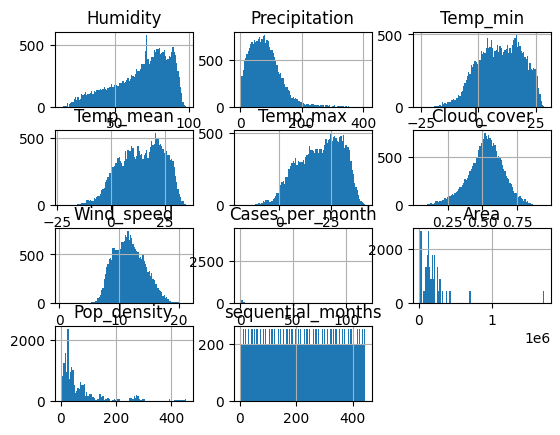

In [205]:
USA.hist(bins = 100)

In [206]:
numeric_columns = ['Humidity', 'Precipitation', 'Temp_min', 'Temp_mean',
       'Temp_max', 'Cloud_cover', 'Wind_speed', 'Cases_per_month', 'Pop_density']

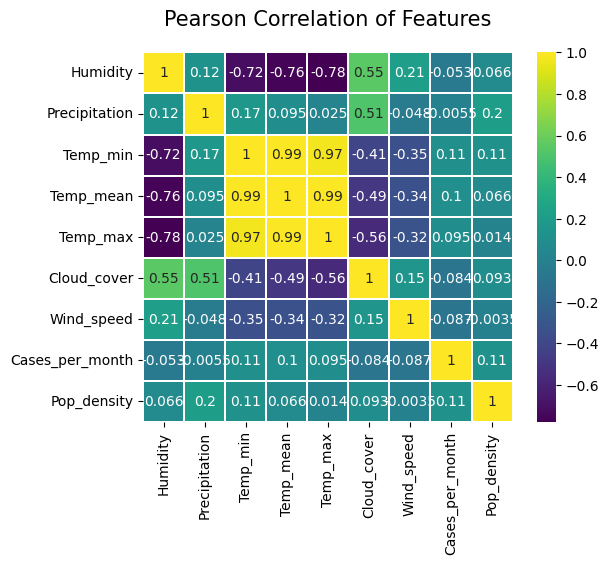

In [243]:
colormap = plt.cm.viridis
plt.figure()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(USA[numeric_columns].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
# plt.savefig(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Images\Mcorr.png')  # Save as PNG

## Modélisation

### A) Evaluation des hyperparamètres du KNN imputer

Comme on n'a pas les vraies valeurs d'humidité, il faut évaluer le modèle de régression pour les différentes valeurs de k dans le KNN imputer. Voir https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/.

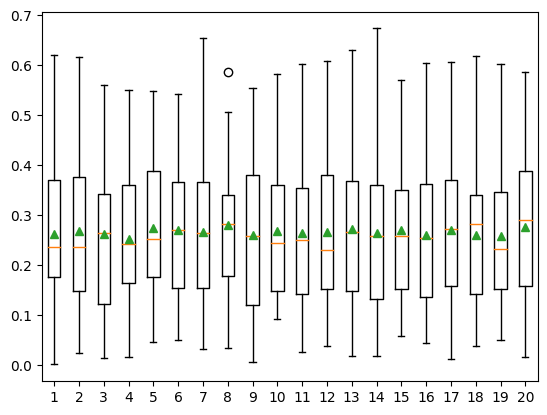

In [242]:
plt.boxplot(np.abs(np.array(results).T), labels=strategies, showmeans=True)
plt.show()


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>1 0.262 (0.146)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>2 0.257 (0.163)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>3 0.253 (0.161)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>4 0.248 (0.142)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>5 0.256 (0.169)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>6 0.256 (0.157)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>7 0.253 (0.168)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>8 0.250 (0.183)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>9 0.244 (0.171)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>10 0.256 (0.152)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>11 0.257 (0.163)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>12 0.249 (0.176)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>13 0.266 (0.161)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>14 0.249 (0.177)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>15 0.252 (0.167)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>16 0.244 (0.171)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>17 0.261 (0.158)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>18 0.254 (0.149)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>19 0.252 (0.149)


The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.
The least populated class in y has only 1 members, which is less than n_splits=10.


>20 0.263 (0.163)


ValueError: Dimensions of labels and X must be compatible

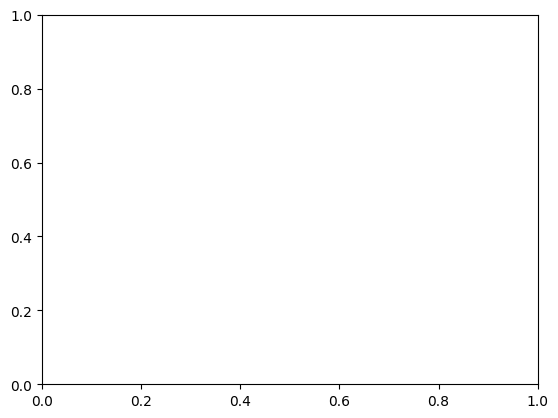

In [241]:
# # Extract the features (variables) for KNN imputation, excluding the 'State' column
# features = USA.drop(columns=['State','Cases_per_month','state_code'])
# # humidity_column_index = merged_df_test.columns.get_loc(['Humidity'])
# # Extract the target variable, which is 'Humidity'
# target_idx = np.nonzero(features.columns == 'Humidity')

# # Convert the data to numpy arrays
# X = features.values

X = USA.drop(columns=['State'])
X = X[X['Year'] <= 2021]#on sélectionne seulement les données passées où on a des cas de dengue répertoriés
y = X['Cases_per_month']
X = X.drop(columns=['Cases_per_month'])
scaler =  RobustScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

# Define a range of n_neighbors values to evaluate
n_neighbors_values = range(1,20)

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Load or prepare your dataset (X is your feature matrix with missing values)
results = list()
strategies = [str(i) for i in range(1,21)]
for s in strategies:
    # create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestRegressor())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_scaled, y, scoring=None, cv=cv, n_jobs=-1) #score is None = score by default for the chosen model. For RandomForestRegressor, the default is "sqared_error"
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(np.abs(np.array(results).T), labels=strategies, showmeans=True)
plt.show()


Le nombre de voisins utilisés pour imputer les valeurs d'humidité n'a pas d'effet sur le score du modèle. 

### B- Le modèle peut-il prédire les événements du passé ?

#### Random Forest Regressor


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


85
86
87
88
89
90
91
92
93
94
95
96


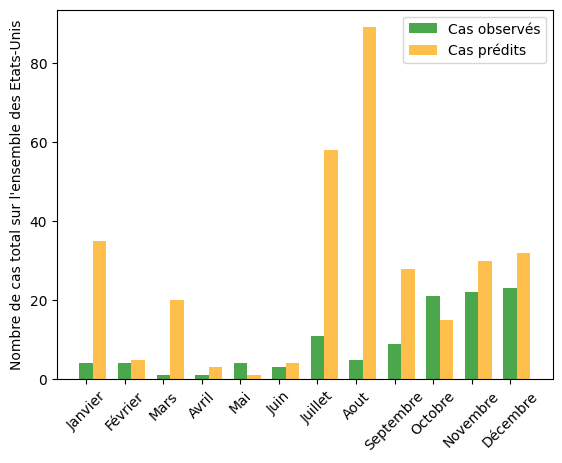

In [94]:
# Without groups
X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
X_to_scale = X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X_to_scale)
X_scaled = pd.DataFrame(scaler.transform(X_to_scale))
X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = X_scaled
USA_scaled = X

PRED = []
REAL = []


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

for predict_month in range(12*7+1,12*8+1):
    print(predict_month)

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = np.array(USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

  
    model = RandomForestRegressor(random_state = 42)

    model.fit(X_train, y_train)
    

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    


t = np.arange(1,13)

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()




In [161]:
nb_zeros = np.sum(Z, axis = 0)
nb_zeros.shape

(12,)

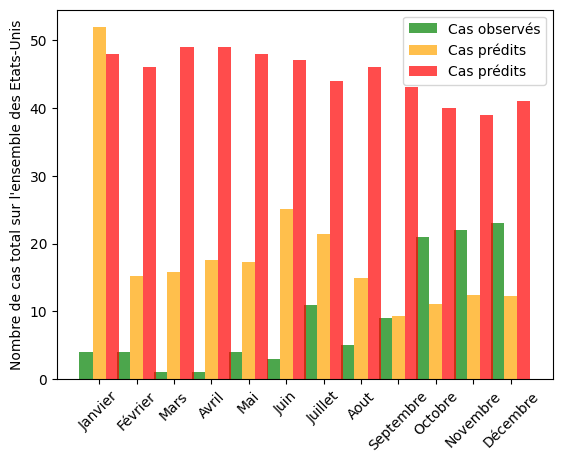

In [163]:
# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t-bar_width,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t ,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.bar(t + bar_width,nb_zeros, width = bar_width, label = 'Cas prédits', color = 'red', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()

In [173]:
X.Month_1.sum()

1850.0

97


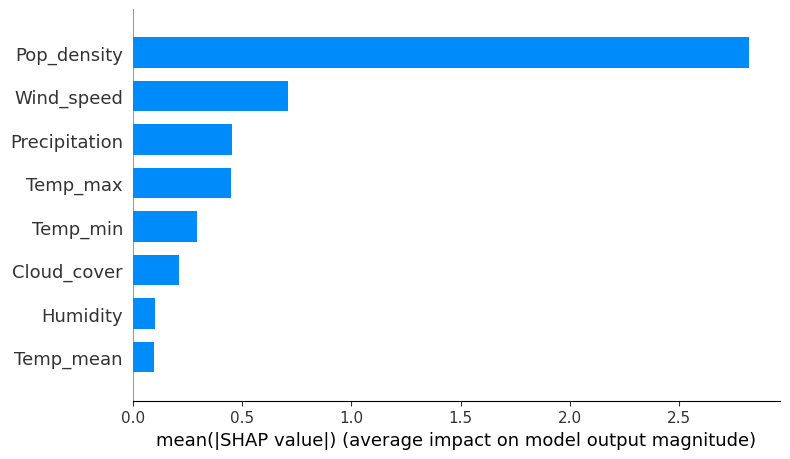

98


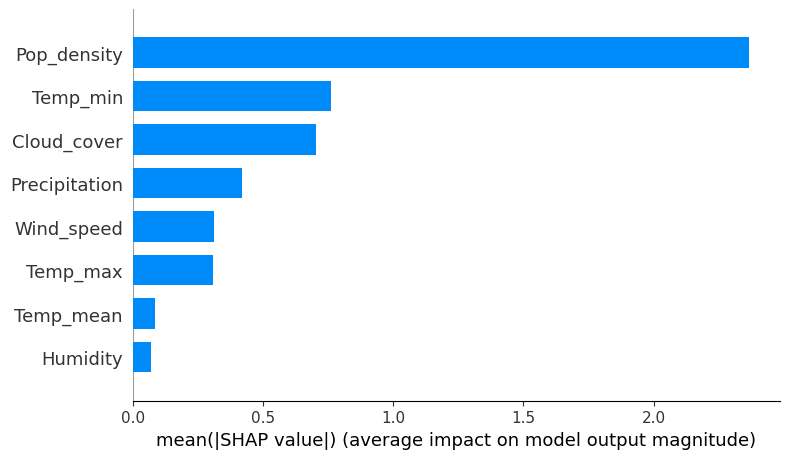

99


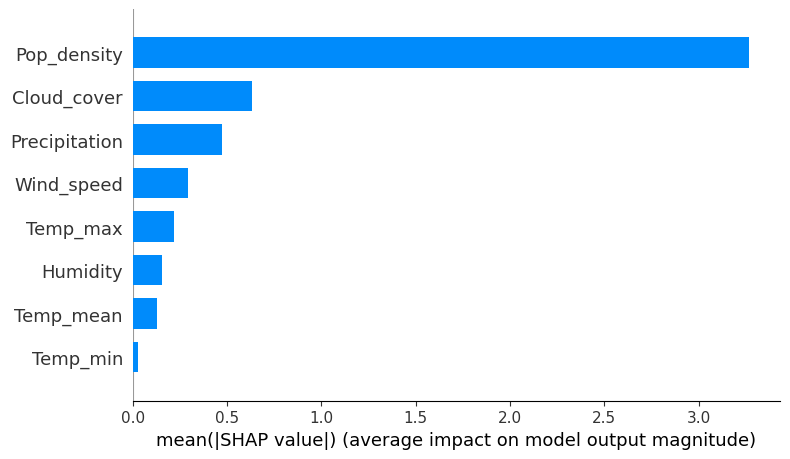

100


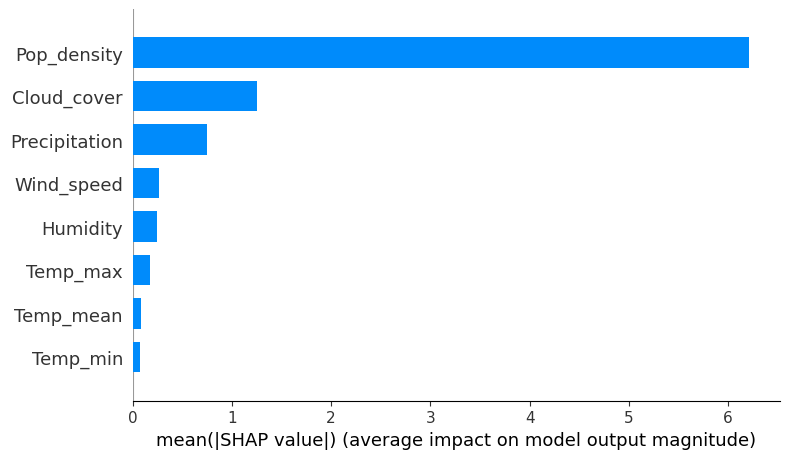

101


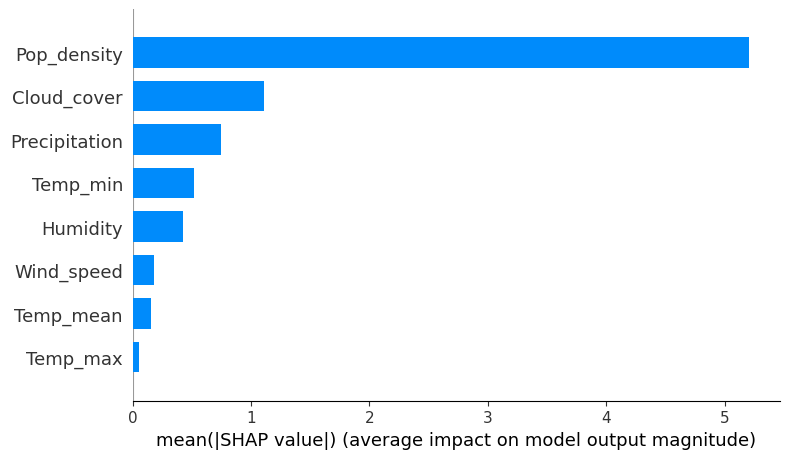

102


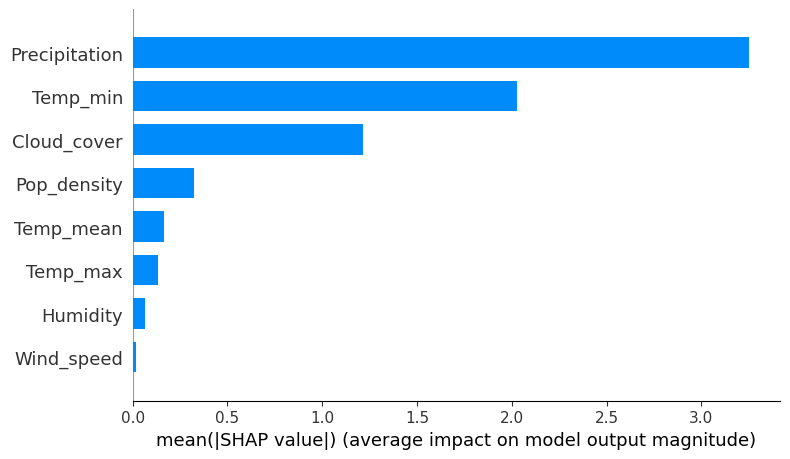

103


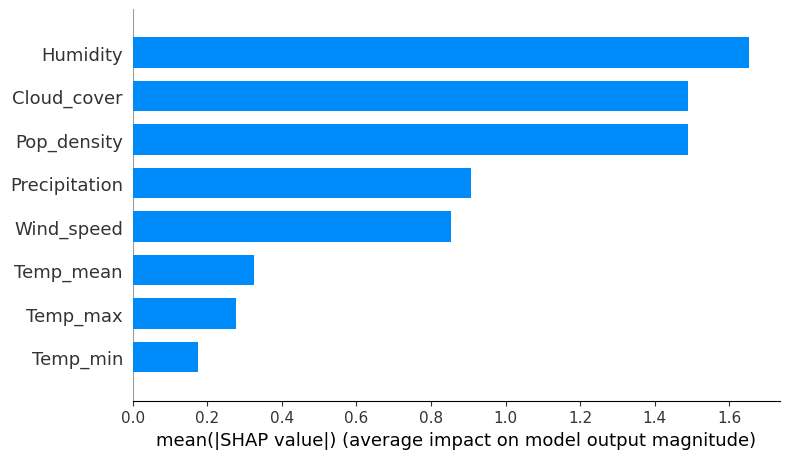

104


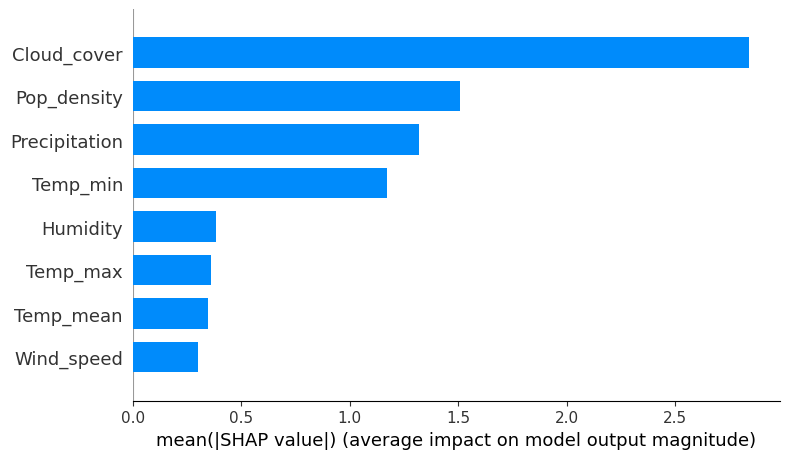

105


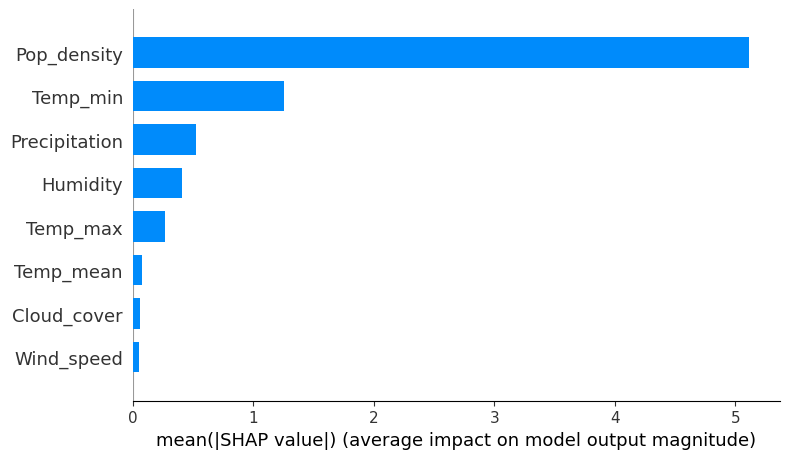

106


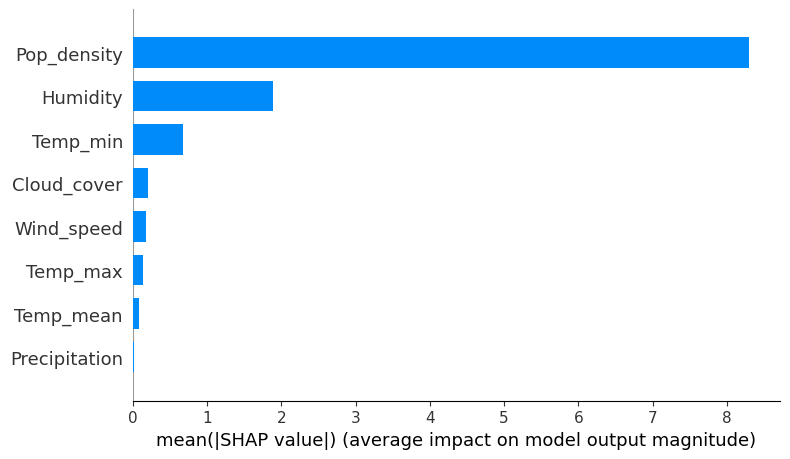

107


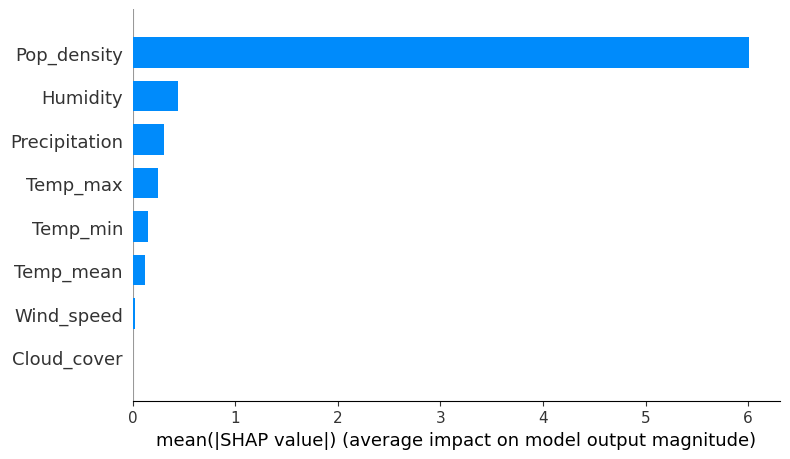

108


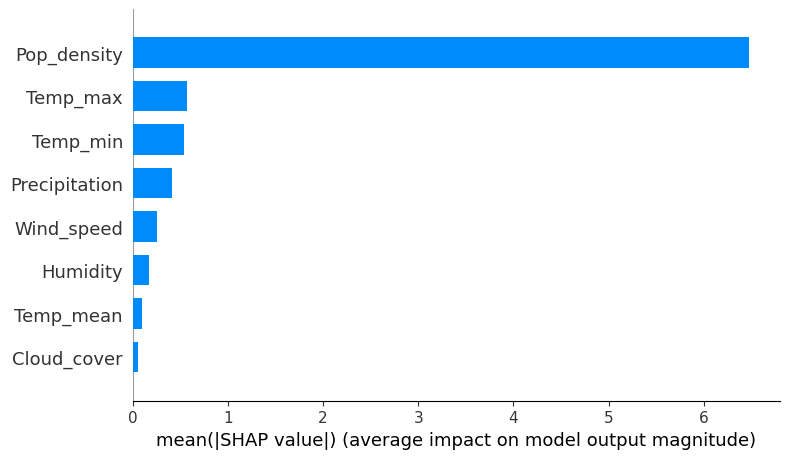

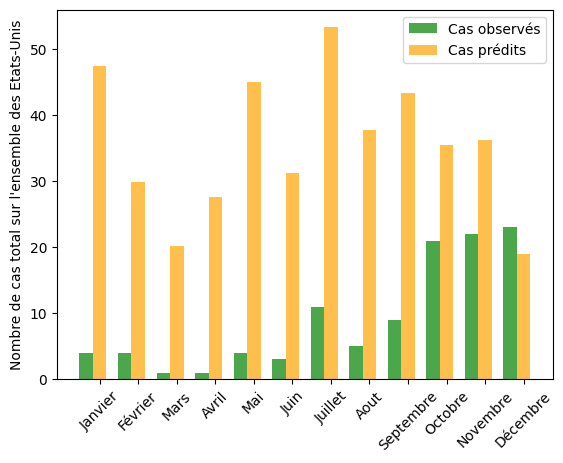

In [14]:
USA = pd.read_csv(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\USA_f.csv')
# USA.drop(['Unnamed: 0'], axis = 1, inplace = True)


# # Without groups
# X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]

# # one hot encoder 
# encoder = OneHotEncoder(handle_unknown='ignore')
# #perform one-hot encoding on 'embarked' column
# encoded = pd.DataFrame(encoder.fit_transform(X[['Year','Month','sequential_months']]).toarray(), columns = encoder.get_feature_names_out())
# X = X.drop(['Year','Month','sequential_months'],axis = 1)
# X = X.join(encoded)

# Without groups
X = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]

# # one hot encoder 
# encoder = OneHotEncoder(handle_unknown='ignore')
# #perform one-hot encoding on 'embarked' column
# encoded = pd.DataFrame(encoder.fit_transform(X[['Year','Month','sequential_months']]).toarray(), columns = encoder.get_feature_names_out())
# X = X.drop(['Year','Month','sequential_months'],axis = 1)
# X = X.join(encoded)

scaler =  RobustScaler().fit(X)
USA_scaled = pd.DataFrame(scaler.transform(X))
USA_scaled.columns = X.columns

PRED = np.zeros([50,12])
REAL = np.zeros([50,12])


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
model = XGBRegressor(random_state = 42, n_estimators = 100)
# model = RandomForestRegressor(random_state = 42)
for predict_month in range(12*8+1,12*9+1):
    print(predict_month)
    state_idx = 0
    for state in USA['State'].unique():

        X_train = USA_scaled.loc[(USA['sequential_months'] >= 13) &  (USA['sequential_months'] <= (predict_month-1)) & (USA['State']==state),:]
        y_train = np.array(USA.loc[(USA['sequential_months'] >= 13) &  (USA['sequential_months'] <= (predict_month-1)) & (USA['State']==state),['Cases_per_month']]).flatten()

        X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month) & (USA['State']==state),:]
        y_test = np.array(USA.loc[(USA['sequential_months'] == predict_month) & (USA['State']==state),['Cases_per_month']]).flatten()

        
        

        model.fit(X_train, y_train)

        if state == "FLORIDA":
            # Create an explainer for the Random Forest model
            explainer = shap.Explainer(model, X_train)
            # Calculate SHAP values for the test set
            shap_values = explainer.shap_values(X_test, check_additivity = False)
            mean_shap_val = np.mean(abs(shap_values), axis = 0)
            idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
            # best_param_counts[0,idx_best_param]+=1
            shap.summary_plot(shap_values, X_test, plot_type="bar")
            # Show the plot
            plt.show()
            

        # for state in USA['State']:
        y_pred = model.predict(X_test)
        # y_pred = np.round(y_pred,0)
        # if predict_month == 12*7+1:
        #     PRED = y_pred
        #     REAL = y_test
        # else:
        PRED[state_idx,predict_month-(12*8+1)] = y_pred
        REAL[state_idx,predict_month-(12*8+1)] = y_test
        state_idx += 1

        # REAL = np.column_stack((REAL, y_test))

    


t = np.arange(1,13)

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)
# Z = REAL == 0
# nb_zeros = np.sum(Z, axis = 0)



# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t-bar_width,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t ,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
# plt.bar(t + bar_width,nb_zeros, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()




In [8]:
y_train

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  1.,  0.,  0.,  0.])

#### XGBoost

In [140]:
# GRID SEARCH
X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
# X_to_scale = X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
# X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = X_scaled
USA_scaled = X_scaled

PRED = []
REAL = []


param_grid = {
    'n_estimators': range(50,1000,50),
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth' : [3,4,5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
    # Add other hyperparameters to search
}


    

    # X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    # y_train = np.array(USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    # X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    # y_test = np.array(USA_scaled.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()
X_train = USA_scaled[USA['sequential_months']<= 12*8]
print(X_train.shape)
y_train = USA.loc[USA['sequential_months']<= 12*8,'Cases_per_month']
print(np.shape(y_train))
model = XGBRegressor(random_state = 42)
search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                        n_iter=100, cv=10, n_jobs=-1, verbose=1, scoring = 'neg_mean_absolute_error' )
# search = GridSearchCV(estimator=model, param_grid=param_grid,
#                                         scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
result = search.fit(X_train, y_train)
print(result.best_params_)
print("Best: %f using %s" % (result.best_score_, result.best_params_))
    

    # # for state in USA['State']:
    # y_pred = MyModel.predict(X_test)
    # y_pred = np.round(y_pred,0)
    # if predict_month == 12*7+1:
    #     PRED = y_pred
    #     REAL = y_test
    # else:
    #     PRED = np.column_stack((PRED, y_pred))
    #     REAL = np.column_stack((REAL, y_test))

    


# t = np.arange(1,13)

# obs = np.sum(REAL,axis = 0)
# pred = np.sum(PRED,axis = 0)

# # ref = REAL[0:12]
# bar_width = 0.35
# plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
# plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
# plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
# plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
# plt.legend()




Boolean Series key will be reindexed to match DataFrame index.


(4800, 11)
(4800,)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.3, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best: -1.129425 using {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.3, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}


85
86
87
88
89
90
91
92
93
94
95
96


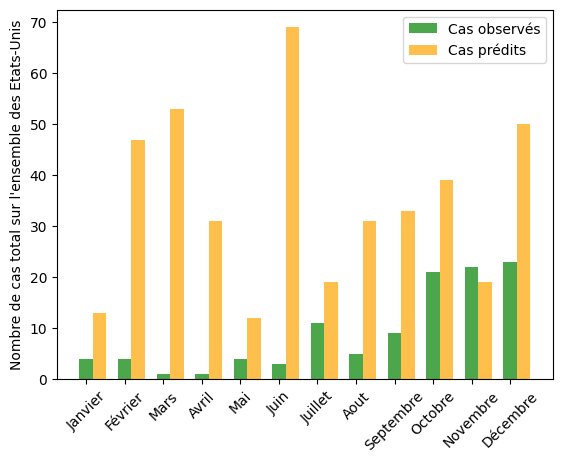

In [174]:
# # Without groups
# X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
# # X_to_scale = X[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
# scaler =  RobustScaler().fit(X)
# X_scaled = pd.DataFrame(scaler.transform(X))
# # X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = X_scaled
# USA_scaled = X_scaled

# Without groups
X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]

# one hot encoder 
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'embarked' column
encoded = pd.DataFrame(encoder.fit_transform(X[['Year','Month','sequential_months']]).toarray(), columns = encoder.get_feature_names_out())
X = X.drop(['Year','Month','sequential_months'],axis = 1)
X = X.join(encoded)

scaler =  RobustScaler().fit(X)
USA_scaled = pd.DataFrame(scaler.transform(X))
USA_scaled.columns = X.columns

PRED = []
REAL = []


# param_grid = {
#     'n_estimators': [100,120,150],
#     'learning_rate': [0.01, 0.02, 0.05],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'reg_alpha': [0, 0.1, 0.2, 0.3],
#     'reg_lambda': [0, 0.1, 0.2, 0.3]
#     # Add other hyperparameters to search
# }
model = XGBRegressor(subsample = 0.8, reg_lambda = 0.1, reg_alpha = 0.3, n_estimators = 500, max_depth = 5, learning_rate = 0.01, gamma = 0.1, colsample_bytree = 0.9, random_state = 45)

for predict_month in range(12*7+1,12*8+1): #de janvier 2021 à décembre 2021
    print(predict_month)

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = np.array(USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

    # if predict_month == 12*7+1:

        # search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
        #                                      n_iter=10,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1, random_state=42)

        


    model.fit(X_train, y_train)
    

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    


t = np.arange(1,13)

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()




85
86
87
88
89
90
91
92
93
94
95
96


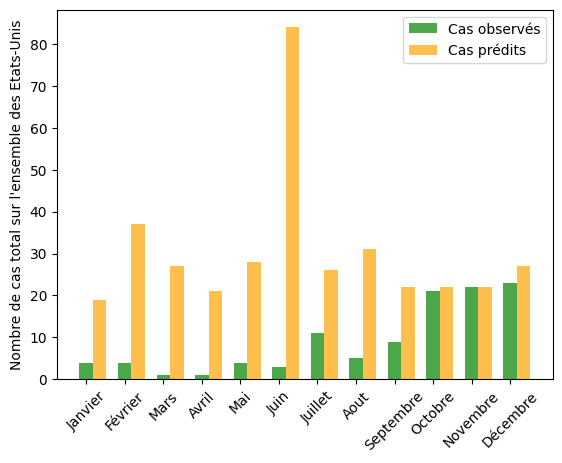

In [128]:
# Without groups
X = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X)
USA_scaled = pd.DataFrame(scaler.transform(X))
USA_scaled.columns = X.columns

PRED = []
REAL = []

# PRED_subset = []
# US_states_ordered =  USA['State'].unique()
# best_param_counts = np.zeros((1,len(X.columns)))
# subset_bestParam_counts = np.zeros((len(US_states_ordered),len(X.columns)))


# ST = 'CALIFORNIA'
# ST_idx = np.where(US_states_ordered == ST)[0][0]


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# param_grid = {
#     'n_estimators': [10, 20, 50, 100, 200],         # Number of trees in the forest
#     'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], #Function used to measure the quality of a split
#     'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4, 6, 8],         # Minimum samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for each split
#     'min_impurity_decrease' : [0,0.5,1,10],
#     'bootstrap': [True, False]             # Whether to use bootstrapping   
# }

for predict_month in range(12*7+1,12*8+1):
    print(predict_month)

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = np.array(USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

    # REAL_subset.append(y_test_subset)
    # if predict_month == 12*7+1:
    #     REAL_subset = y_test_subset
    # else:
    #     REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    

    # if (predict_month - (12*7+1))%6 == 0: #reajuster le modèle tous les 6 mois
    # Fit a regression model
    # if predict_month == 12*7+1:
    #     model = RandomForestRegressor(random_state = 42)
    #     best_model = HalvingGridSearchCV(estimator=model, param_grid=param_grid,
    #                                         scoring='neg_mean_squared_error', factor=3,
    #                                         verbose=1, random_state=42)

    # if predict_month == 12*7+1:
    model = RandomForestRegressor(random_state = 43)
        # best_model = GridSearchCV(estimator=model, param_grid=param_grid,
                                            # scoring='neg_mean_squared_error', njobs=-1,
                                            # verbose=1, random_state=42, cv = 2)
            
    model.fit(X_train, y_train)
    

    # # if (predict_month - (12*7+1))%12 == 0: #Faire le plot shap tous les ans
    # # Create an explainer for the Random Forest model
    # explainer = shap.Explainer(model, X_train)
    # # Calculate SHAP values for the test set
    # shap_values = explainer.shap_values(X_test, check_additivity = False)
    # mean_shap_val = np.mean(abs(shap_values), axis = 0)
    # idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
    # best_param_counts[0,idx_best_param]+=1
    # # shap.summary_plot(shap_values, X_test, plot_type="bar")
    # # Show the plot
    # # plt.show()
    
    # # Create a DataFrame to store the data
    # data = pd.DataFrame({'Feature': X_test.columns, 'Shapley Value': abs(shap_values[ST_idx,:])})

    # # Sort the DataFrame by Shapley values in decreasing order
    # sorted_data = data.sort_values(by='Shapley Value', ascending=False)

    # # Create a horizontal bar plot using Seaborn
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x='Shapley Value', y='Feature', data=sorted_data, palette='Blues_d')
    # plt.xlabel('Shapley Value')
    # plt.ylabel('Feature')
    # title = f"Features contributions for {US_states_ordered[ST_idx]}"
    # plt.title(title)
    # plt.show()

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    


t = np.arange(1,13)
# predictions = []
# for monthi in range(12):
#     predictions[monthi] = PRED[0:12]

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()





A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


85
86
87
88
89
90
91
92
93
94
95
96


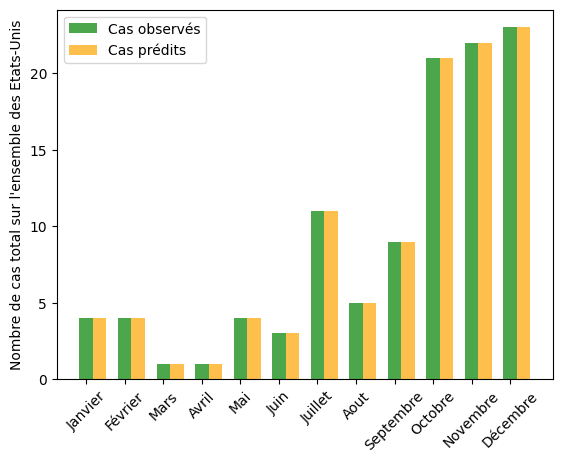

In [88]:
# Without groups
# USA_bis = USA.loc[USA['sequential_months']<= 12*8,['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity','Cases_per_month']]
USA_bis = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity','Cases_per_month']]
X = USA_bis[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
USA_bis[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = X_scaled

PRED = []
REAL = []

PRED_subset = []
US_states_ordered =  USA['State'].unique()
best_param_counts = np.zeros((1,len(X.columns)))
subset_bestParam_counts = np.zeros((len(US_states_ordered),len(X.columns)))


ST = 'CALIFORNIA'
ST_idx = np.where(US_states_ordered == ST)[0][0]


for predict_month in range(12*7+1,12*8+1):
    print(predict_month)
    X_train = USA_bis.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_bis.loc[(USA['sequential_months'] == predict_month),:]
    y_test = np.array(USA_bis.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

    # REAL_subset.append(y_test_subset)
    # if predict_month == 12*7+1:
    #     REAL_subset = y_test_subset
    # else:
    #     REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    

    # if (predict_month - (12*7+1))%6 == 0: #reajuster le modèle tous les 6 mois
    # Fit a regression model
    # if predict_month == 12*7+1:
    #     model = RandomForestRegressor(random_state = 42)
    #     best_model = HalvingGridSearchCV(estimator=model, param_grid=param_grid,
    #                                         scoring='neg_mean_squared_error', factor=3,
    #                                         verbose=1, random_state=42)

    
    # model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state = 42)
    model = RandomForestRegressor(random_state = 42)
            
    model.fit(X_train, y_train)
    

    # # if (predict_month - (12*7+1))%12 == 0: #Faire le plot shap tous les ans
    # # Create an explainer for the Random Forest model
    # explainer = shap.Explainer(model, X_train)
    # # Calculate SHAP values for the test set
    # shap_values = explainer.shap_values(X_test, check_additivity = False)
    # mean_shap_val = np.mean(abs(shap_values), axis = 0)
    # idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
    # best_param_counts[0,idx_best_param]+=1
    # # shap.summary_plot(shap_values, X_test, plot_type="bar")
    # # Show the plot
    # # plt.show()
    
    # # Create a DataFrame to store the data
    # data = pd.DataFrame({'Feature': X_test.columns, 'Shapley Value': abs(shap_values[ST_idx,:])})

    # # Sort the DataFrame by Shapley values in decreasing order
    # sorted_data = data.sort_values(by='Shapley Value', ascending=False)

    # # Create a horizontal bar plot using Seaborn
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x='Shapley Value', y='Feature', data=sorted_data, palette='Blues_d')
    # plt.xlabel('Shapley Value')
    # plt.ylabel('Feature')
    # title = f"Features contributions for {US_states_ordered[ST_idx]}"
    # plt.title(title)
    # plt.show()

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    
t = np.arange(1,13)
# predictions = []
# for monthi in range(12):
#     predictions[monthi] = PRED[0:12]

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()




In [83]:
# Without groups
X = USA[['Year','Month','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X)
USA_scaled = X
USA_scaled[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = pd.DataFrame(scaler.transform(X[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]))
USA_scaled.columns = X.columns

PRED = []
REAL = []

PRED_subset = []
US_states_ordered =  USA['State'].unique()
best_param_counts = np.zeros((1,len(X.columns)))
subset_bestParam_counts = np.zeros((len(US_states_ordered),len(X.columns)))


ST = 'CALIFORNIA'
ST_idx = np.where(US_states_ordered == ST)[0][0]


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# param_grid = {
#     'n_estimators': [10, 20, 50, 100, 200],         # Number of trees in the forest
#     'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], #Function used to measure the quality of a split
#     'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4, 6, 8],         # Minimum samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for each split
#     'min_impurity_decrease' : [0,0.5,1,10],
#     'bootstrap': [True, False]             # Whether to use bootstrapping   
# }

for predict_month in range(12*7+1,12*8+1):
    print(predict_month)

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = np.array(USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

    # REAL_subset.append(y_test_subset)
    # if predict_month == 12*7+1:
    #     REAL_subset = y_test_subset
    # else:
    #     REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    

    # if (predict_month - (12*7+1))%6 == 0: #reajuster le modèle tous les 6 mois
    # Fit a regression model
    # if predict_month == 12*7+1:
    #     model = RandomForestRegressor(random_state = 42)
    #     best_model = HalvingGridSearchCV(estimator=model, param_grid=param_grid,
    #                                         scoring='neg_mean_squared_error', factor=3,
    #                                         verbose=1, random_state=42)

    # if predict_month == 12*7+1:
    model = RandomForestRegressor(random_state = 42)
        # best_model = GridSearchCV(estimator=model, param_grid=param_grid,
                                            # scoring='neg_mean_squared_error', njobs=-1,
                                            # verbose=1, random_state=42, cv = 2)
            
    model.fit(X_train, y_train)
    

    # # if (predict_month - (12*7+1))%12 == 0: #Faire le plot shap tous les ans
    # # Create an explainer for the Random Forest model
    # explainer = shap.Explainer(model, X_train)
    # # Calculate SHAP values for the test set
    # shap_values = explainer.shap_values(X_test, check_additivity = False)
    # mean_shap_val = np.mean(abs(shap_values), axis = 0)
    # idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
    # best_param_counts[0,idx_best_param]+=1
    # # shap.summary_plot(shap_values, X_test, plot_type="bar")
    # # Show the plot
    # # plt.show()
    
    # # Create a DataFrame to store the data
    # data = pd.DataFrame({'Feature': X_test.columns, 'Shapley Value': abs(shap_values[ST_idx,:])})

    # # Sort the DataFrame by Shapley values in decreasing order
    # sorted_data = data.sort_values(by='Shapley Value', ascending=False)

    # # Create a horizontal bar plot using Seaborn
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x='Shapley Value', y='Feature', data=sorted_data, palette='Blues_d')
    # plt.xlabel('Shapley Value')
    # plt.ylabel('Feature')
    # title = f"Features contributions for {US_states_ordered[ST_idx]}"
    # plt.title(title)
    # plt.show()

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    


t = np.arange(1,13)
# predictions = []
# for monthi in range(12):
#     predictions[monthi] = PRED[0:12]

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()




ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Month
- Year


#### XGboost regressor ou gradient boosting regressor https://medium.com/p/7694c90e45c1

In [300]:
# Without groups
# X = USA[['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
USA_bis = USA.loc[USA['sequential_months']<= 12*8,['Year','Month','sequential_months','Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity','Cases_per_month']]
X = USA_bis[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']]
scaler =  RobustScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
USA_bis[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = X_scaled

PRED = []
REAL = []

PRED_subset = []
US_states_ordered =  USA['State'].unique()
best_param_counts = np.zeros((1,len(X.columns)))
subset_bestParam_counts = np.zeros((len(US_states_ordered),len(X.columns)))


ST = 'CALIFORNIA'
ST_idx = np.where(US_states_ordered == ST)[0][0]


for predict_month in range(12*7+1,12*8+1):
    print(predict_month)
    X_train = USA_bis.loc[(USA_bis['sequential_months'] >= 1) &  (USA_bis['sequential_months'] <= (predict_month-1)),:]
    y_train = np.array(USA_bis.loc[(USA_bis['sequential_months'] >= 1) &  (USA_bis['sequential_months'] <= (predict_month-1)),['Cases_per_month']]).flatten()

    X_test = USA_bis.loc[(USA_bis['sequential_months'] == predict_month),:]
    y_test = np.array(USA_bis.loc[(USA_bis['sequential_months'] == predict_month) ,['Cases_per_month']]).flatten()

    # REAL_subset.append(y_test_subset)
    # if predict_month == 12*7+1:
    #     REAL_subset = y_test_subset
    # else:
    #     REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    

    # if (predict_month - (12*7+1))%6 == 0: #reajuster le modèle tous les 6 mois
    # Fit a regression model
    # if predict_month == 12*7+1:
    #     model = RandomForestRegressor(random_state = 42)
    #     best_model = HalvingGridSearchCV(estimator=model, param_grid=param_grid,
    #                                         scoring='neg_mean_squared_error', factor=3,
    #                                         verbose=1, random_state=42)

    
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state = 42)
    # model = RandomForestRegressor(random_state = 42)
            
    model.fit(X_train, y_train)
    

    # # if (predict_month - (12*7+1))%12 == 0: #Faire le plot shap tous les ans
    # # Create an explainer for the Random Forest model
    # explainer = shap.Explainer(model, X_train)
    # # Calculate SHAP values for the test set
    # shap_values = explainer.shap_values(X_test, check_additivity = False)
    # mean_shap_val = np.mean(abs(shap_values), axis = 0)
    # idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
    # best_param_counts[0,idx_best_param]+=1
    # # shap.summary_plot(shap_values, X_test, plot_type="bar")
    # # Show the plot
    # # plt.show()
    
    # # Create a DataFrame to store the data
    # data = pd.DataFrame({'Feature': X_test.columns, 'Shapley Value': abs(shap_values[ST_idx,:])})

    # # Sort the DataFrame by Shapley values in decreasing order
    # sorted_data = data.sort_values(by='Shapley Value', ascending=False)

    # # Create a horizontal bar plot using Seaborn
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x='Shapley Value', y='Feature', data=sorted_data, palette='Blues_d')
    # plt.xlabel('Shapley Value')
    # plt.ylabel('Feature')
    # title = f"Features contributions for {US_states_ordered[ST_idx]}"
    # plt.title(title)
    # plt.show()

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    if predict_month == 12*7+1:
        PRED = y_pred
        REAL = y_test
    else:
        PRED = np.column_stack((PRED, y_pred))
        REAL = np.column_stack((REAL, y_test))

    
    # # Calculate Mean Absolute Error (MAE)
    # mae = mean_absolute_error(y_test, np.round(y_pred,0))
    # mae = mean_absolute_error(y_test, int(y_pred))
    # # mae/y_test.mean()




85
86
87
88
89
90
91
92
93
94
95
96


#### Modèle spécifique pour les séries temporelles : ARMA etc ...  https://builtin.com/data-science/time-series-forecasting-python, https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/#using-the-auto-arima-model-to-make-predictions

In [ ]:
y = YSA
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

ARIMA(seasonality = 'Yes')

#### RNN

In [277]:
y_test.shape

(3, 4200)

In [278]:
# Define sequence length (e.g., 3 months for prediction)
sequence_length = 12*7

# Select relevant columns
data = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity','Cases_per_month','sequential_months']]
data = data[data['sequential_months']<=12*8]

# Normalize numerical features (optional but recommended)
scaler = RobustScaler()
data[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']] = scaler.fit_transform(data[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']])

# Create sequences and corresponding target values
X = []
y = []

#sequence matrix: (sequence_length*Nstates)*Nvariables

for i in range(int(len(data)/len(USA['State'].unique()) - sequence_length)):

    X.append(data.loc[(data['sequential_months']>=i+1) & (data['sequential_months']<=i+sequence_length), ['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Humidity']].values)  # Features (Climate and Demographics)
    y.append(data.loc[(data['sequential_months']>=i+1) & (data['sequential_months']<=i+sequence_length), 'Cases_per_month'])  # Target (Dengue Cases)
    

X = np.array(X)
num_features = X.shape[2]
y = np.array(y)


# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(sequence_length,len(USA['State'].unique()), num_features)),
    tf.keras.layers.Dense(50, activation = 'softmax')  # Output layer for regression
    # Dense(50, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train-test split
# X_train = X[0:9,:,:]
# X_test = X[10:11,:,:]
# y_train = y[0:9,:]
# y_test = y[10:11,:] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=100)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

# Make predictions for the year 2021
# predictions= model.predict(X_test)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\chateaux.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 1608, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 50 and 4200 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_7/dense_7/Softmax, IteratorGetNext:1)' with input shapes: [?,50], [?,4200].


In [ ]:
sequence_length

84

In [267]:
y.shape

(12, 4250)

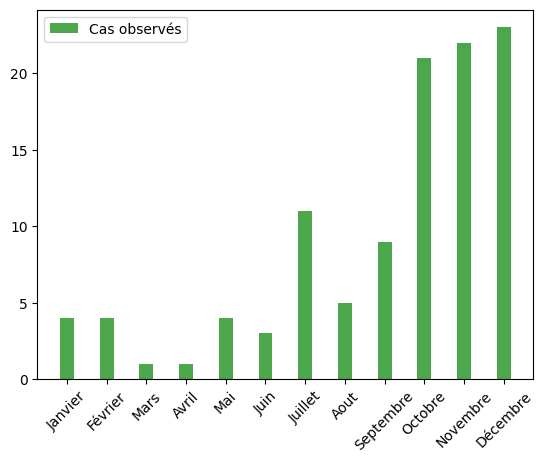

In [262]:
t = np.arange(1,13)
real = []
for monthi in range(12):
    real.append(np.sum(USA.loc[(USA['Year'] == 2021) & (USA['Month'] == (monthi + 1)),'Cases_per_month'])) #PRED[0:12]

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,real, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
# plt.bar(t + bar_width,predictions, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
# plt.xticks(range(1,13),list(calendar.month_name)[1:],rotation = 45)
# plt.yticks([0,1,2])
plt.legend()

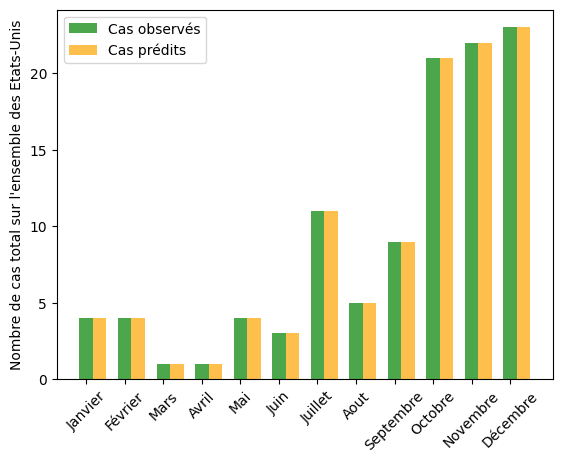

In [301]:
t = np.arange(1,13)
# predictions = []
# for monthi in range(12):
#     predictions[monthi] = PRED[0:12]

obs = np.sum(REAL,axis = 0)
pred = np.sum(PRED,axis = 0)

# ref = REAL[0:12]
bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas total sur l'ensemble des Etats-Unis")
plt.legend()

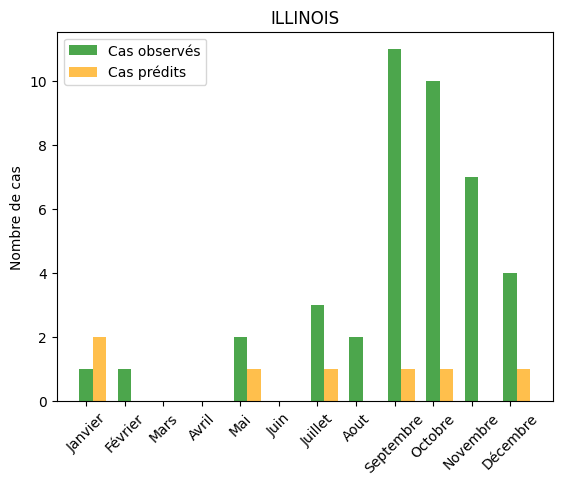

In [271]:
#ILLINOIS
ST = 'ILLINOIS'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

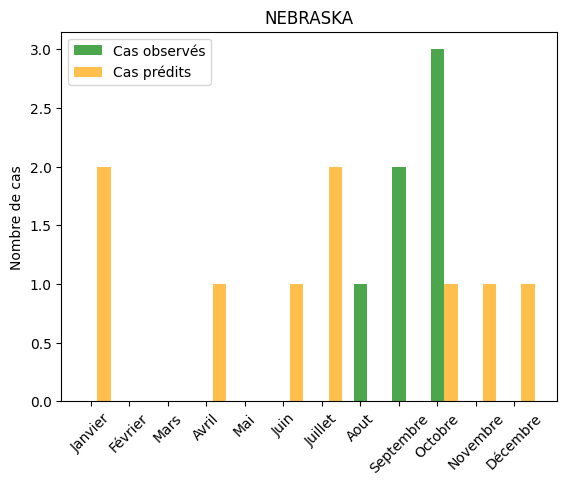

In [272]:
#NEBRASKA
ST = 'NEBRASKA'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

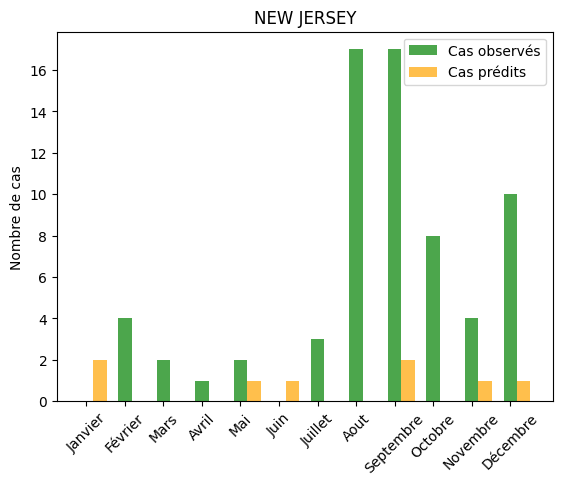

In [274]:
#NEW JERSEY
ST = 'NEW JERSEY'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

In [142]:
USA[(USA['State']=='NEW YORK') & (USA['Year']==2021)]

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month,state_code,Demographic,Area,Pop_density,sequential_months
4572,NEW YORK,2021,1,88.380653,82.021080,-12.329901,-8.540009,-4.540740,0.797057,14.343323,0.0,NY,2.008740e+07,141297,142.164346,85
4573,NEW YORK,2021,2,92.766922,67.145943,-10.648039,-6.867385,-2.789216,0.717231,12.476523,0.0,NY,2.006650e+07,141297,142.016429,86
4574,NEW YORK,2021,3,87.552216,91.608727,-3.343014,0.090897,4.258096,0.753640,13.070765,0.0,NY,2.004560e+07,141297,141.868511,87
4575,NEW YORK,2021,4,85.499184,105.443497,3.864475,8.464231,13.791323,0.617854,11.933843,0.0,NY,2.002469e+07,141297,141.720593,88
4576,NEW YORK,2021,5,77.395187,108.188118,9.349908,13.966374,19.447660,0.633956,13.851784,0.0,NY,2.000379e+07,141297,141.572676,89
4577,NEW YORK,2021,6,74.892815,87.766045,14.915389,19.892212,24.976669,0.544291,9.706359,0.0,NY,1.998289e+07,141297,141.424758,90
4578,NEW YORK,2021,7,65.532051,91.205887,17.308331,22.044363,27.202606,0.512385,8.756917,0.0,NY,1.996199e+07,141297,141.276840,91
4579,NEW YORK,2021,8,62.381577,215.694992,17.656021,21.036346,25.388229,0.686879,9.148341,0.0,NY,1.994109e+07,141297,141.128922,92
4580,NEW YORK,2021,9,67.708832,88.409134,15.658326,19.698521,24.667206,0.497652,10.395060,0.0,NY,1.992019e+07,141297,140.981005,93
4581,NEW YORK,2021,10,83.078941,109.559929,7.078664,10.057502,13.956697,0.661221,11.099352,0.0,NY,1.989929e+07,141297,140.833087,94


In [141]:
USA.Year.unique()

[2014, 2015, 2016, 2017, 2018, ..., 2046, 2047, 2048, 2049, 2050]
Length: 37
Categories (37, int64): [2014, 2015, 2016, 2017, ..., 2047, 2048, 2049, 2050]

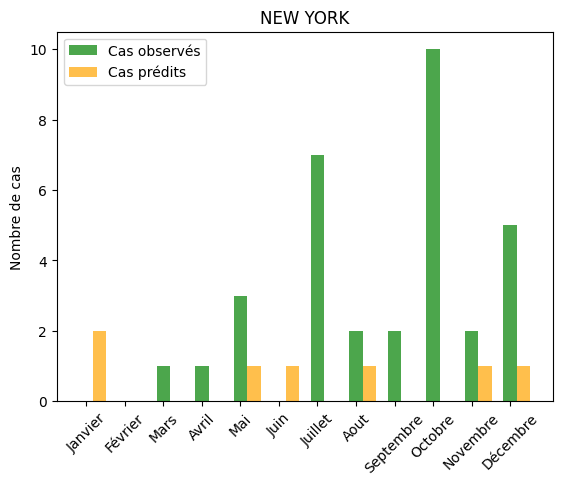

In [275]:
#NEW YORK
ST = 'NEW YORK'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

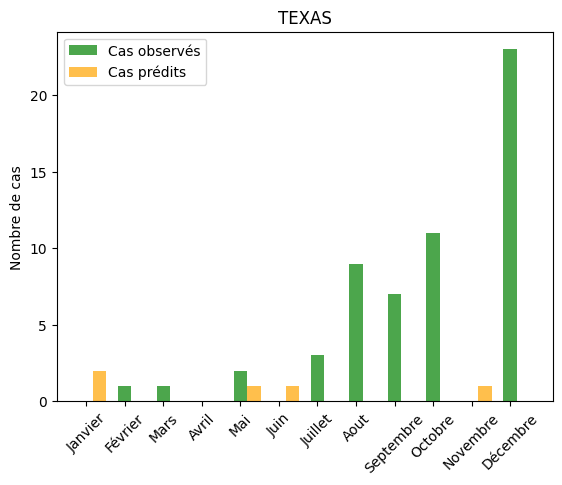

In [276]:
#TEXAS
ST = 'TEXAS'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

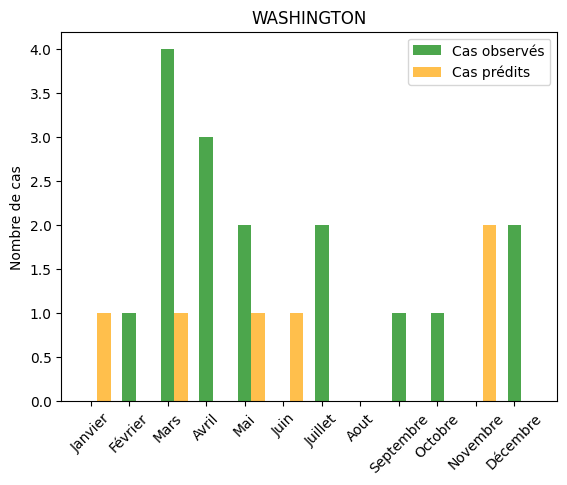

In [277]:
#WASHINGTON
ST = 'WASHINGTON'
ST_idx = np.where(US_states_ordered == ST)[0][0]
t = np.arange(1,13)
obs = REAL[ST_idx,:]
pred = PRED[ST_idx,:]

bar_width = 0.35
plt.bar(t,obs, width = bar_width, label = 'Cas observés', color = 'green', alpha = 0.7)
plt.bar(t + bar_width,pred, width = bar_width, label = 'Cas prédits', color = 'orange', alpha = 0.7)
plt.xticks(range(1,13),['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'],rotation = 45)
plt.ylabel("Nombre de cas")
plt.title(ST)
plt.legend()

#### Futur

In [ ]:
# Without groups
X = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Demographic','Humidity']]
scaler =  RobustScaler().fit(X)
USA_scaled = pd.DataFrame(scaler.transform(X))
USA_scaled.columns = X.columns

PRED_future = []
bestParamCounts_future = []
# REAL = []

PRED_future_subset = []
US_states_ordered =  USA['State'].unique()
subset_states_idx = (US_states_ordered == 'CALIFORNIA') | (US_states_ordered == 'TEXAS') | (US_states_ordered == 'FLORIDA') | (US_states_ordered == 'NEW JERSEY') | (US_states_ordered == 'NEW YORK') | (US_states_ordered == 'ILLINOIS') | (US_states_ordered == 'WASHINGTON') | (US_states_ordered == 'NEBRASKA')
# REAL_subset = np.zeros((sum(subset_states_idx),1))
# REAL_subset = []


model = RandomForestRegressor()

for predict_month in range(12*8+1,12*n_years+1):

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]

    y_test_subset = np.array(y_test[subset_states_idx])
    # REAL_subset.append(y_test_subset)
    # if predict_month == 12*7+1:
    #     REAL_subset = y_test_subset
    # else:
    #     REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    

    # if (predict_month - (12*7+1))%6 == 0: #reajuster le modèle tous les 6 mois
    # Fit a regression model
    model.fit(X_train, y_train)

    # if (predict_month - (12*7+1))%12 == 0: #Faire le plot shap tous les ans
    # Create an explainer for the Random Forest model
    explainer = shap.Explainer(model, X_train)
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test, check_additivity = False)
    mean_shap_val = np.mean(abs(shap_values), axis = 0)
    idx_best_param = np.where(mean_shap_val == np.max(mean_shap_val))
    bestParamCounts_future[0,idx_best_param]+=1
    

    if (predict_month - (12*8+1))%12 == 0: #Faire le plot shap tous les ans
    # Create an explainer for the Random Forest model
        explainer = shap.Explainer(model, X_train)
        # Calculate SHAP values for the test set
        shap_values = explainer.shap_values(X_test, check_additivity = False)
        shap.summary_plot(shap_values, X_test, plot_type="bar")
        # Show the plot
        plt.show()

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    y_pred_subset = np.array(y_pred[subset_states_idx])
    if predict_month == 12*8+1:
        PRED_future_subset = y_pred_subset
    else:
        PRED_future_subset = np.column_stack((PRED_future_subset, y_pred_subset))
    # PRED_subset.append(y_pred_subset)
    # PRED_subset[:,predict_month - (12*7)] = y_pred_subset
    if predict_month >= 12*8+1: #enlever la condition pour remplacer les vraies valeurs par les valeurs prédites pour les 12 premiers mois où on a des vraies valeurs
        USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']] = y_pred
    y_pred_sum = np.sum(y_pred)

    # REAL.append(np.sum(y_test))
    PRED_future.append(y_pred_sum)
    

    # # Calculate Mean Absolute Error (MAE)
    # mae = mean_absolute_error(y_test, np.round(y_pred,0))
    # mae = mean_absolute_error(y_test, int(y_pred))
    # # mae/y_test.mean()




In [104]:
# Without groups
X = USA[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Pop_density','Demographic','Humidity']]
scaler =  RobustScaler().fit(X)
USA_scaled = pd.DataFrame(scaler.transform(X))
USA_scaled.columns = X.columns

PRED = []
REAL = []

PRED_subset = []
US_states_ordered =  USA['State'].unique()
subset_states_idx = (US_states_ordered == 'CALIFORNIA') | (US_states_ordered == 'TEXAS') | (US_states_ordered == 'FLORIDA') | (US_states_ordered == 'NEW JERSEY') | (US_states_ordered == 'NEW YORK') | (US_states_ordered == 'ILLINOIS') | (US_states_ordered == 'WASHINGTON') | (US_states_ordered == 'NEBRASKA')
# REAL_subset = np.zeros((sum(subset_states_idx),1))
REAL_subset = []

for predict_month in range(12*7+1,12*8+1): #range(12*7+1,12*n_years+1):

    X_train = USA_scaled.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),:]
    y_train = USA.loc[(USA['sequential_months'] >= 1) &  (USA['sequential_months'] <= (predict_month-1)),['Cases_per_month']]

    X_test = USA_scaled.loc[(USA['sequential_months'] == predict_month),:]
    y_test = USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']]

    y_test_subset = np.array(y_test[subset_states_idx])
    # REAL_subset.append(y_test_subset)
    if predict_month == 12*7+1:
        REAL_subset = y_test_subset
    else:
        REAL_subset = np.column_stack((REAL_subset, y_test_subset))
    # REAL_subset[:,predict_month - (12*7)-1] = y_test_subset
    
    # Fit a regression model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # for state in USA['State']:
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    y_pred_subset = np.array(y_pred[subset_states_idx])
    if predict_month == 12*7+1:
        PRED_subset = y_pred_subset
    else:
        PRED_subset = np.column_stack((PRED_subset, y_pred_subset))
    # PRED_subset.append(y_pred_subset)
    # PRED_subset[:,predict_month - (12*7)] = y_pred_subset
    if predict_month >= 12*8+1: #enlever la condition pour remplacer les vraies valeurs par les valeurs prédites pour les 12 premiers mois où on a des vraies valeurs
        USA.loc[(USA['sequential_months'] == predict_month) ,['Cases_per_month']] = y_pred
    y_pred_avg = np.mean(y_pred)

    REAL.append(np.mean(y_test))
    PRED.append(y_pred_avg)
    

    # # Calculate Mean Absolute Error (MAE)
    # mae = mean_absolute_error(y_test, np.round(y_pred,0))
    # mae = mean_absolute_error(y_test, int(y_pred))
    # # mae/y_test.mean()


#     #272 minutes de calcul = 4h30

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

In [ ]:
USA[np.isnan(USA['Cases_per_month'])]

,State,Year,Month,Humidity,Precipitation,Temp_min,Temp_mean,Temp_max,Cloud_cover,Wind_speed,Cases_per_month,state_code,Demographic,Area,Pop_density,sequential_months


In [ ]:
# Save for visualization with dash
# USA.to_csv(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\USA_with_pred.csv', index=False)

In [ ]:
import pickle
data = {"y_pred" : PRED, "y_real" : REAL}
with open(r"C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\Models\predictions_randomForestRegressor.pkl", "wb") as file:
    pickle.dump(data, file)

In [ ]:
PRED_subset = np.round(PRED_subset,0)

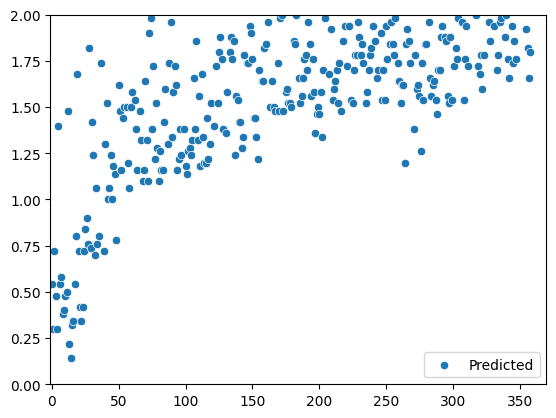

In [ ]:
#plot for all states
sns.scatterplot(x = range(len(PRED)), y = PRED, label = 'Predicted')
# sns.scatterplot(x = range(len(PRED)), y = REAL, label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,370])
plt.legend()
plt.show()

In [ ]:
USA = pd.read_csv(r'C:\Users\chateaux.m\Documents\DESU_DS\Projet\Data\USA\USA_with_pred.csv')

In [ ]:
predictions

85    2.0
86    1.0
87    1.0
88    0.0
89    1.0
90    1.0
91    2.0
92    1.0
93    1.0
94    0.0
95    0.0
Name: Cases_per_month, dtype: float64

In [ ]:
USA.columns

Index(['State', 'Year', 'Month', 'Humidity', 'Precipitation', 'Temp_min',
       'Temp_mean', 'Temp_max', 'Cloud_cover', 'Wind_speed', 'Cases_per_month',
       'state_code', 'Demographic', 'Area', 'Pop_density',
       'sequential_months'],
      dtype='object')

In [ ]:
USA.loc[USA['sequential_months'] == 7*12+1+monthi,'Cases_per_month'].mean()

0.5

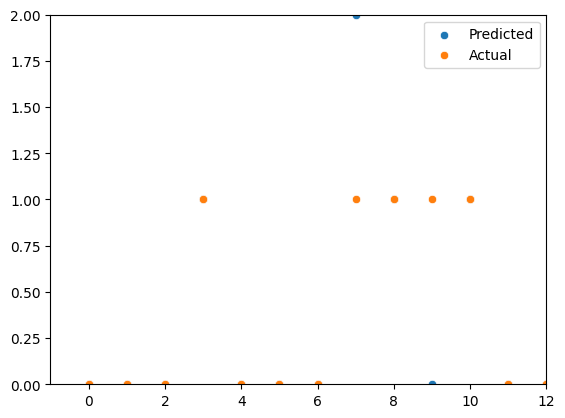

In [ ]:
#CALIFORNIA
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[0,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[0,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

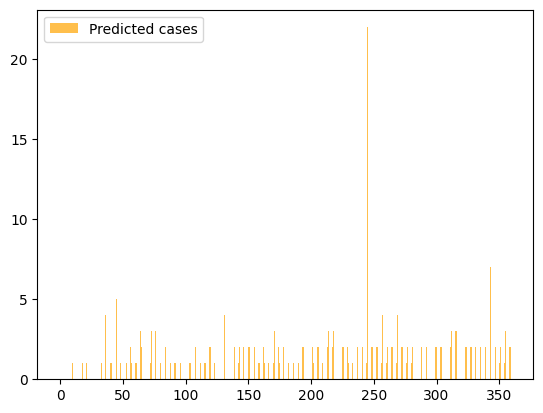

In [ ]:
#CALIFORNIA
t = np.arange(np.shape(PRED_subset)[1])
predictions = PRED_subset[0,:]
ref = REAL_subset[0,:]
bar_width = 0.35
# plt.bar(t,ref, width = bar_width, label = 'Observed cases', color = 'green', alpha = 0.7)
plt.bar(t,predictions, width = bar_width, label = 'Predicted cases', color = 'orange', alpha = 0.7)
plt.legend()

<Axes: >

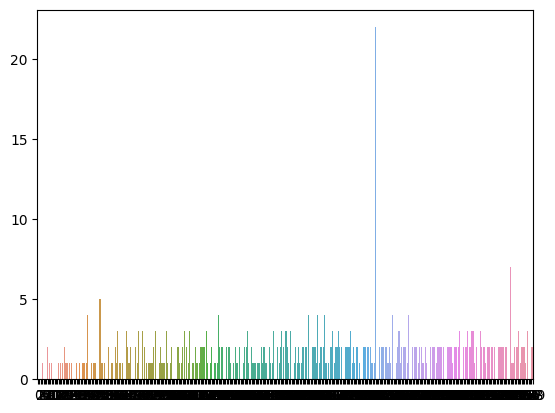

In [ ]:
sns.barplot( x=t, y=predictions)

In [ ]:
data.head()

,0
0.0,0
0.0,1
0.0,2
1.0,3
0.0,4


<Axes: xlabel='months', ylabel='Density'>

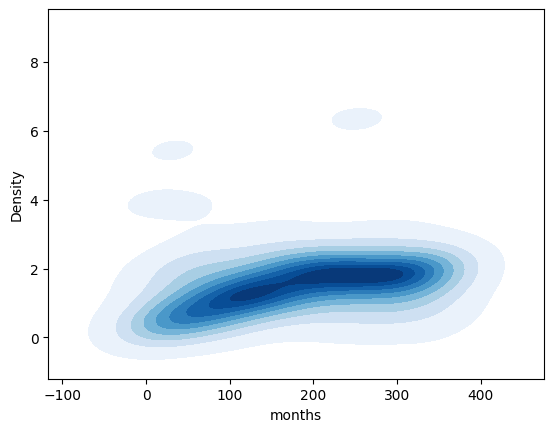

In [ ]:
data = pd.DataFrame({'months' : t, 'predictions' : predictions})

window_size = 3  # Adjust the window size as needed

# Calculate the density using a rolling sum and normalize
data['Density'] = data['predictions'].rolling(window=window_size, min_periods=1).sum() / window_size

# Create the density plot
# sns.set(style="whitegrid")  # Optional: Set a different style
sns.kdeplot(data=data, x="months", y="Density", cmap="Blues", fill=True)


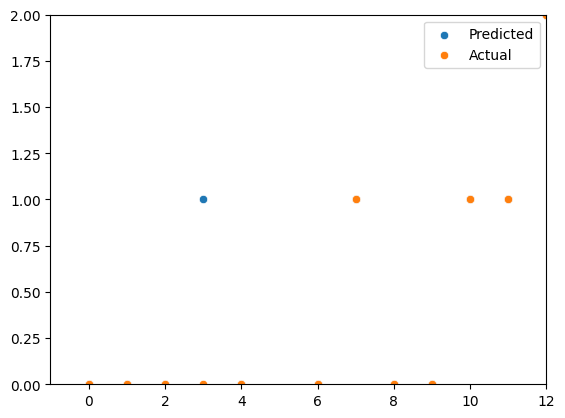

In [ ]:
#FLORIDA
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[1,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[1,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

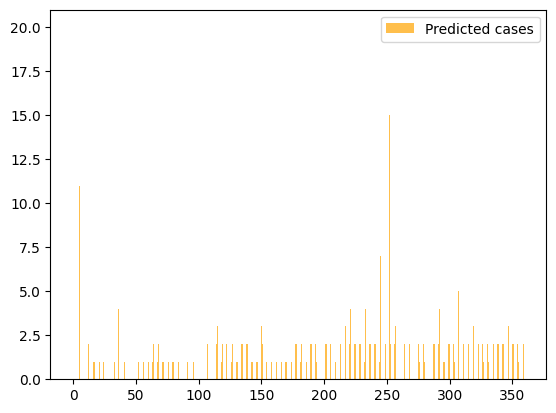

In [ ]:
#FLORIDA
t = np.arange(np.shape(PRED_subset)[1])
predictions = PRED_subset[1,:]
ref = REAL_subset[1,0:12]
bar_width = 0.35
# plt.bar(t,ref, width = bar_width, label = 'Observed cases', color = 'green', alpha = 0.7)
plt.bar(t,predictions, width = bar_width, label = 'Predicted cases', color = 'orange', alpha = 0.7)
plt.legend()

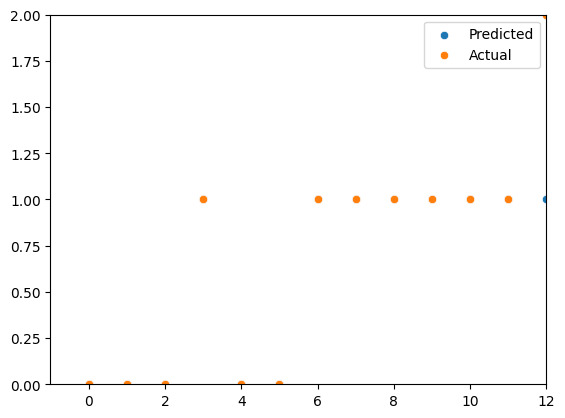

In [ ]:
#ILLINOIS
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[2,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[2,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

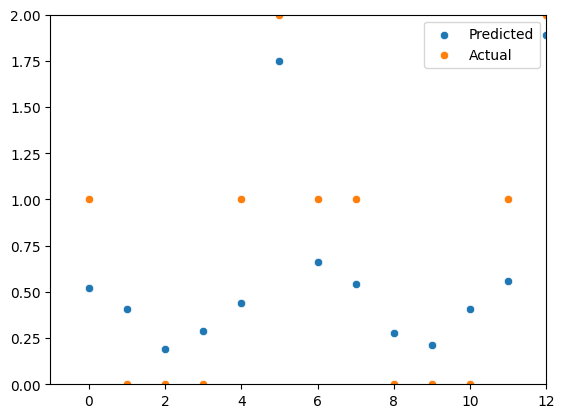

In [ ]:
#NEBRASKA
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[3,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[3,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

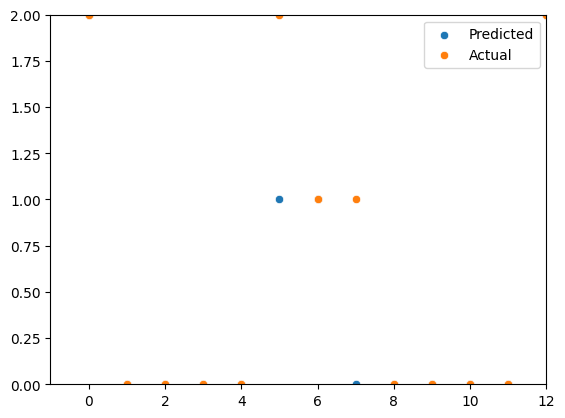

In [ ]:
#NEW JERSEY
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[4,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[4,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

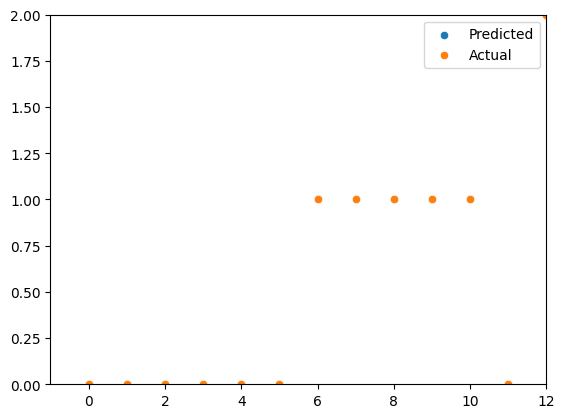

In [ ]:
#NEW YORK
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[5,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[5,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

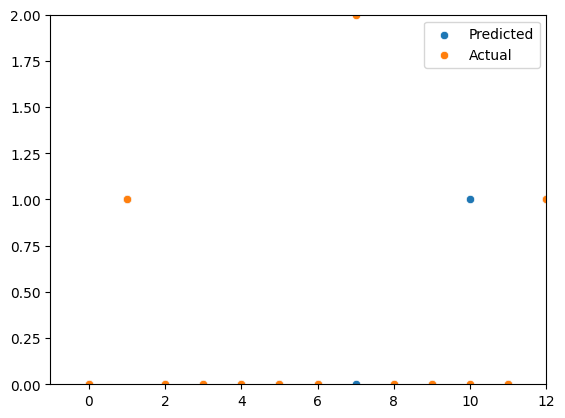

In [ ]:
#TEXAS
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[6,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[6,:], label = 'Actual')
plt.ylim([0,2])
plt.xlim([-1,12])
plt.legend()
plt.show()

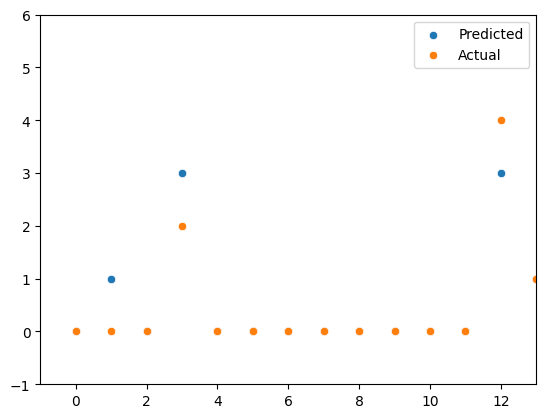

In [ ]:
#WASHINGTON
sns.scatterplot(x = range(len(PRED)), y = PRED_subset[7,:], label = 'Predicted')
sns.scatterplot(x = range(len(PRED)), y = REAL_subset[7,:], label = 'Actual')
plt.ylim([-1,6])
plt.xlim([-1,13])
plt.legend()
plt.show()

## B) Multimodèles

Split data

In [ ]:
# Define your state groups (you need to specify these based on your data)
state_groups = {
    'Group1': Group1,
    'Group2': Group2,
    'Group3': Group3,
    'Group4': Group4,
    'Group5': Group5,
    'Group6': Group6,
}

# Initialize a dictionary to store submodels
submodels = {}

for group_name, states_in_group in state_groups.items():
    group_train_data = train_data[train_data['State'].isin(states_in_group)]
    group_test_data = test_data[test_data['State'].isin(states_in_group)]
    
    # Select features (climate data) and target (dengue cases)
    X_train = group_train_data[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Demographic']]
    scaler =  RobustScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train))
    y_train = group_train_data['Cases_per_month']
    
    # Select features and target for testing
    X_test = group_test_data[['Temp_min', 'Temp_mean', 'Temp_max', 'Precipitation', 'Wind_speed', 'Cloud_cover','Demographic']]
    X_test_scaled = pd.DataFrame(scaler.transform(X_test))
    y_test = group_test_data['Cases_per_month']
    
    # Fit a linear regression model
    model = LinearRegression(fit_intercept=True, normalize = False) #normalize = false because it's already done
    # model = RandomForestRegressor()
    # model = ExtraTreesRegressor()
    # model = svm.SVR()
    model.fit(X_train_scaled, y_train)

    # Extract the coefficients and corresponding feature names
    coefficients = model.coef_
    feature_names = X_train.columns
    # Create a DataFrame to store coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    # Sort the coefficients by absolute value to identify important features
    coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
    sorted_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
    # Create a Coefficient Importance Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y='Abs_Coefficient', x='Feature', data=sorted_coefficients, palette='viridis')

    
    # Add the model to the submodels dictionary
    submodels[group_name] = {}
    submodels[group_name]['model'] = model
    submodels[group_name]['train_data'] = X_train_scaled
    submodels[group_name]['test_data'] = X_test_scaled

    submodels[group_name]['y_train'] = y_train
    submodels[group_name]['y_test'] = y_test

    # Optionally, you can print or store the model's performance metrics (e.g., R-squared, MAE, RMSE) here for evaluation.
    
    